In [1]:
#pip install -U scikit-learn
#pip install seaborn

# Exploratory Data Analysis Starter

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


## Loading data with Pandas

In [3]:
client_df = pd.read_csv('data/t2-client_data.csv')
price_df = pd.read_csv('data/t2-price_data.csv')

---

## Data visualization

Below are some functions that you can use to get started with visualizations. 

In [4]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

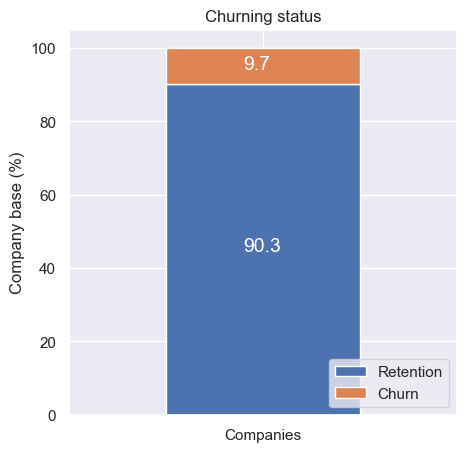

In [5]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [6]:
def plot_distribution_divided_by_churn(dataframe, column_name):
    # Create a new DataFrame with 'column_name' and 'churn' columns
    data_to_plot = dataframe[[column_name, 'churn']]

    # Filter the data for rows where 'churn' is 1 (churned customers)
    churned_data = data_to_plot[data_to_plot['churn'] == 1]

    # Filter the data for rows where 'churn' is 0 (non-churned customers)
    non_churned_data = data_to_plot[data_to_plot['churn'] == 0]

    # Create a single plot for both churned and non-churned customers
    plt.figure(figsize=(10, 6))

    # Plot the distribution of the column for churned customers in red
    sns.histplot(churned_data[column_name], kde=True, color='red', label='Churned')

    # Plot the distribution of the column for non-churned customers in blue
    sns.histplot(non_churned_data[column_name], kde=True, color='blue', label='Non-Churned')

    plt.title(f'Distribution of {column_name} by Churn')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Sub-Task 1: EDA functions

In [7]:
# Output regulators:
display_plot = False
display_print = True

# PLOTS
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

# PLOTS and EDA over specified dataset and column
def stats_unique_values(data, column_name):
  column_rows = len(data[column_name])
  unique_values_count = len(data[column_name].unique())
  # Unique values
  if display_print == True:
      print(f"Column: {column_name} has {unique_values_count} unique values in {column_rows} rows\n")

  #Note, adjust data theshold, now is 500

  # FOR LOW VOLUME DATA
  if unique_values_count < 300:
      # extract data
      value_counts = data[column_name].value_counts().sort_values(ascending=False)
      max_value_length = max(len(str(value)) for value in value_counts.index)
      total_count = value_counts.sum()
      for value, count in value_counts.items():
          percentage = (count / total_count) * 100
          if display_print == True:
              print(f'{value:{max_value_length}}  {count} ({percentage:.2f}%)')
      if display_print == True:
          print("")
      # Display plot
      if display_plot == True:
          if pd.api.types.is_numeric_dtype(data[column_name]):
              plot_continuous_distribution(data , column_name)
          else:
              plot_categorical_distribution(data , column_name)
  # FOR HIGH VOLUME DATA
  else:
      random_numbers = [random.randint(0, unique_values_count-1) for _ in range(5)]
      if display_print == True:
          print("Samples:")
      for num in random_numbers:
          if display_print == True:
              print(data[column_name][num])
      if pd.api.types.is_numeric_dtype(data[column_name]):
          column_stats = data[column_name].describe()
          # Extract and print specific statistics
          mean = column_stats['mean']
          std = column_stats['std']
          min_value = column_stats['min']
          quartile_25 = column_stats['25%']
          median = column_stats['50%']
          quartile_75 = column_stats['75%']
          max_value = column_stats['max']
          if display_print == True:
              print(f"\nDescription:")
              print(f"mean:{mean}")
              print(f"std: {std}")
              print(f"min: {min_value}")
              print(f"25%: {quartile_25}")
              print(f"50%: {median}")
              print(f"75%: {quartile_75}")
              print(f"max: {max_value}")
      else:
          if display_print == True:
              print("\nThe column is not numeric.")
  if display_print == True:
      print(f"\nName: {column_name}, dtype: {data[column_name].dtype}")

  print(f"\n\n\n ---------------------------------------------")


# UNIQUES
def return_unique_values(df_aq, column_name):
    return df_aq[column_name].unique()

# GET COLUMN NAMES
def return_column_names(df_aq):
    return df_aq.columns

In [8]:
def value_extraction_numbers(df, column_name):
    # Initialize variables to store the sum and count of non-zero values
    total_sum = 0
    count_not_zero = 0
    count_zero = 0
    list_gas_12_m = []

    # Iterate through each row
    for index, row in df.iterrows():
        if row[column_name] == 0:
            count_zero= count_zero+1
            continue  # Skip rows where the value is 0
        #print(row[column_name])
        total_sum += row[column_name]
        count_not_zero += 1
        list_gas_12_m.append(row[column_name])
        
    print(f'Total Sum: {total_sum}')
    print(f'Mean: {total_sum/(count_not_zero+count_zero)}')
    print(f'Mean (excluding zeros): {total_sum/count_not_zero}')
    print(f'count NotZero: {count_not_zero}')
    print(f'count Zero: {count_zero}')

    count_zero

    # Step 1: Count unique values
    unique_values_count = len(set(list_gas_12_m))

    # Step 2: Create a distribution plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.histplot(list_gas_12_m, kde=True, color="skyblue")
    plt.title(f"{column_name} Distribution\nUnique Values: {unique_values_count}")
    plt.xlabel(f"{column_name}")
    plt.ylabel("Frequency")
    plt.show()

---

# Client Data EDA

In [9]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0


In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14605.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097159
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296184
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
# Get Column names
column_names = return_column_names(client_df)
print(column_names)


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')


### channel_sales

In [13]:
ac = 'channel_sales'
#Stats
stats_unique_values(client_df, ac)

Column: channel_sales has 8 unique values in 14606 rows

foosdfpfkusacimwkcsosbicdxkicaua  6754 (46.24%)
MISSING                           3725 (25.50%)
lmkebamcaaclubfxadlmueccxoimlema  1843 (12.62%)
usilxuppasemubllopkaafesmlibmsdf  1375 (9.41%)
ewpakwlliwisiwduibdlfmalxowmwpci  893 (6.11%)
sddiedcslfslkckwlfkdpoeeailfpeds  11 (0.08%)
epumfxlbckeskwekxbiuasklxalciiuu  3 (0.02%)
fixdbufsefwooaasfcxdxadsiekoceaa  2 (0.01%)


Name: channel_sales, dtype: object



 ---------------------------------------------


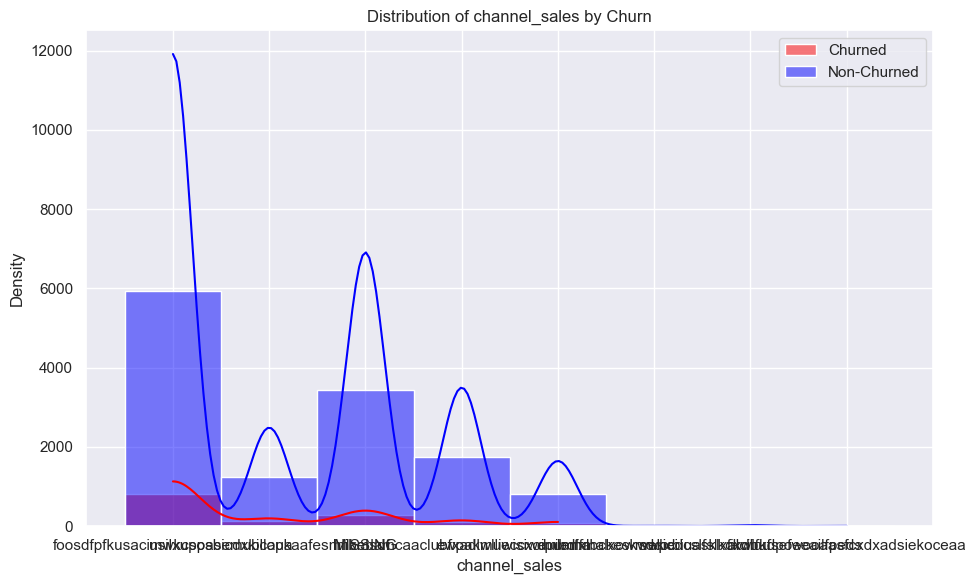

In [14]:
plot_distribution_divided_by_churn(client_df,'channel_sales')

channel_sales has 8 UNIQUE strings [code of the sales channel] Unbalanced distribution.

### cons_12m

Column: cons_12m has 11065 unique values in 14606 rows

Samples:
6335
18546
7702
8159
110513

Description:
mean:159220.2862522251
std: 573465.2641977987
min: 0.0
25%: 5674.75
50%: 14115.5
75%: 40763.75
max: 6207104.0

Name: cons_12m, dtype: int64



 ---------------------------------------------


Total Sum: 2325571501
Mean: 159220.2862522251
Mean (excluding zeros): 160506.00462419767
count NotZero: 14489
count Zero: 117


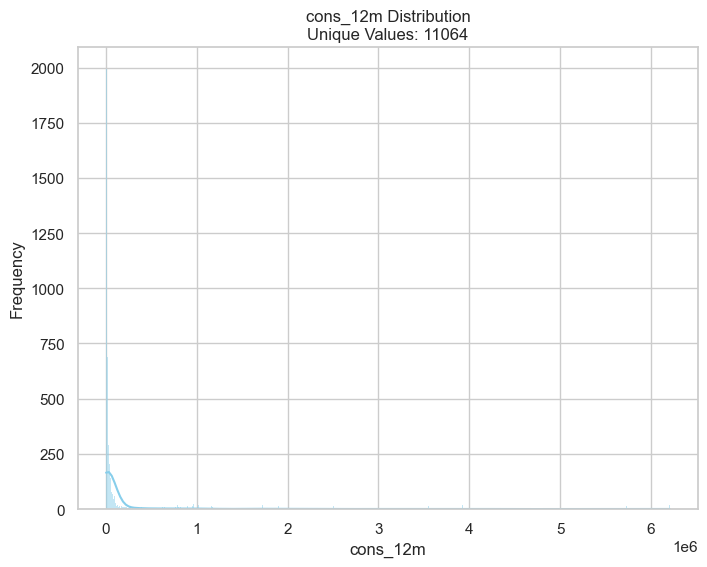

In [15]:
ac = 'cons_12m'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

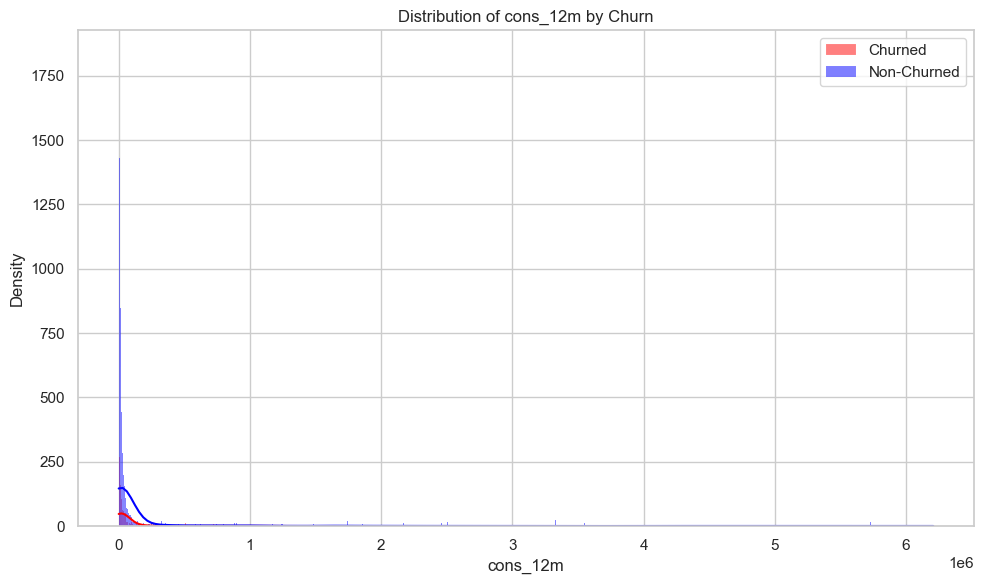

In [16]:
plot_distribution_divided_by_churn(client_df,'cons_12m')

cons_12m has 11065 UNIQUE int64 [electricity consumption of the past 12 months]

Quartile distribution
min: 0.0
25%: 5674.75
50%: 14115.5
75%: 40763.75
max: 6207104.0

### cons_gas_12m

Column: cons_gas_12m has 2112 unique values in 14606 rows

Samples:
0
0
0
0
0

Description:
mean:28092.375325208817
std: 162973.05905732032
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 4154590.0

Name: cons_gas_12m, dtype: int64



 ---------------------------------------------
Total Sum: 410317234
Mean: 28092.375325208817
Mean (excluding zeros): 157089.2932618683
count NotZero: 2612
count Zero: 11994


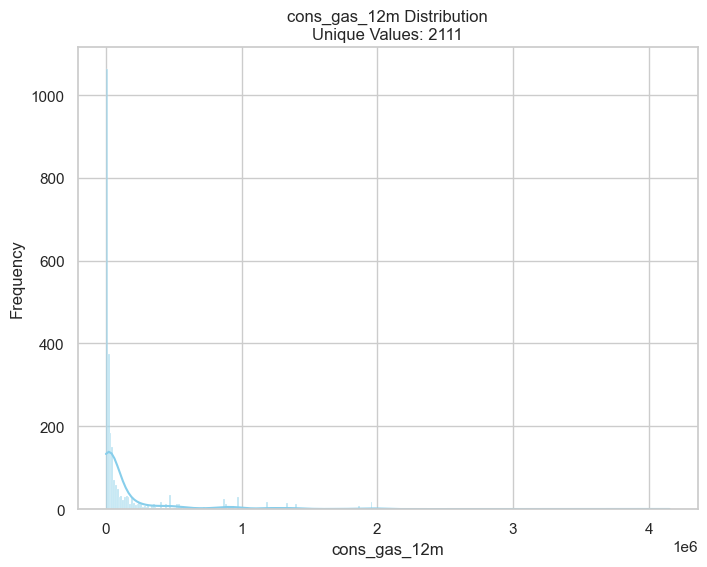

In [17]:
ac = 'cons_gas_12m'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

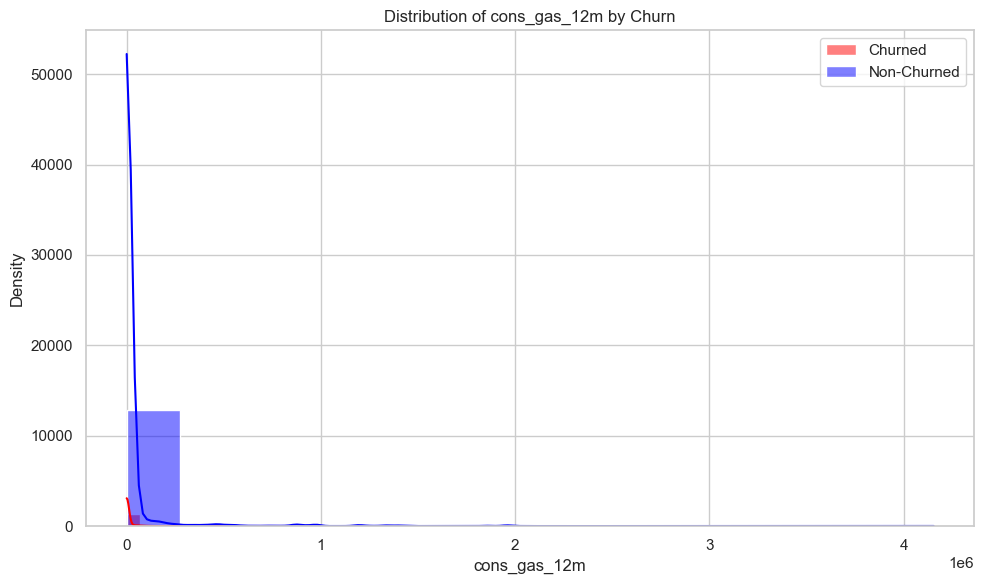

In [18]:
plot_distribution_divided_by_churn(client_df,'cons_gas_12m')

cons_gas_12m has 2112 UNIQUE int64 [gas consumption of the past 12 months]

Quartile distribution
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 4154590.0

Total Sum: 410317234
Mean: 28092.375325208817
Mean (excluding zeros): 157089.2932618683
count NotZero: 2612
count Zero: 11994

### cons_last_month

Column: cons_last_month has 4751 unique values in 14606 rows

Samples:
9319
1094
2654
2654
1591

Description:
mean:16090.269752156648
std: 64364.196421753666
min: 0.0
25%: 0.0
50%: 792.5
75%: 3383.0
max: 771203.0

Name: cons_last_month, dtype: int64



 ---------------------------------------------
Total Sum: 235014480
Mean: 16090.269752156648
Mean (excluding zeros): 24422.16356645537
count NotZero: 9623
count Zero: 4983


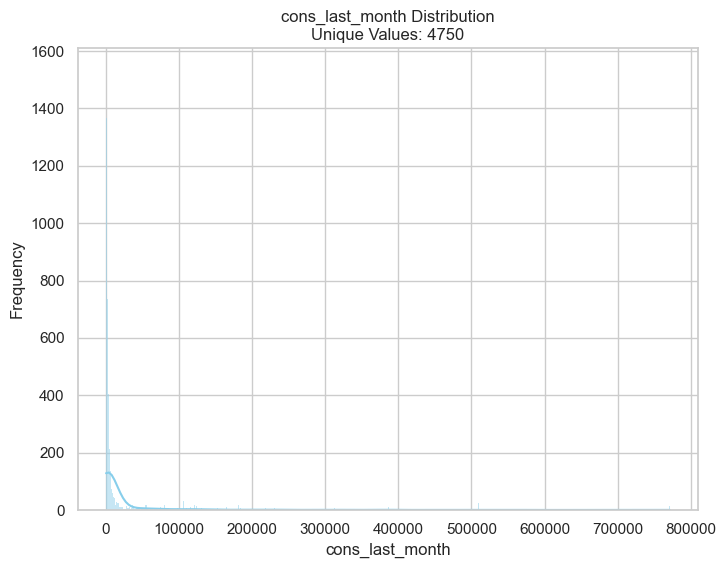

In [19]:
ac = 'cons_last_month'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

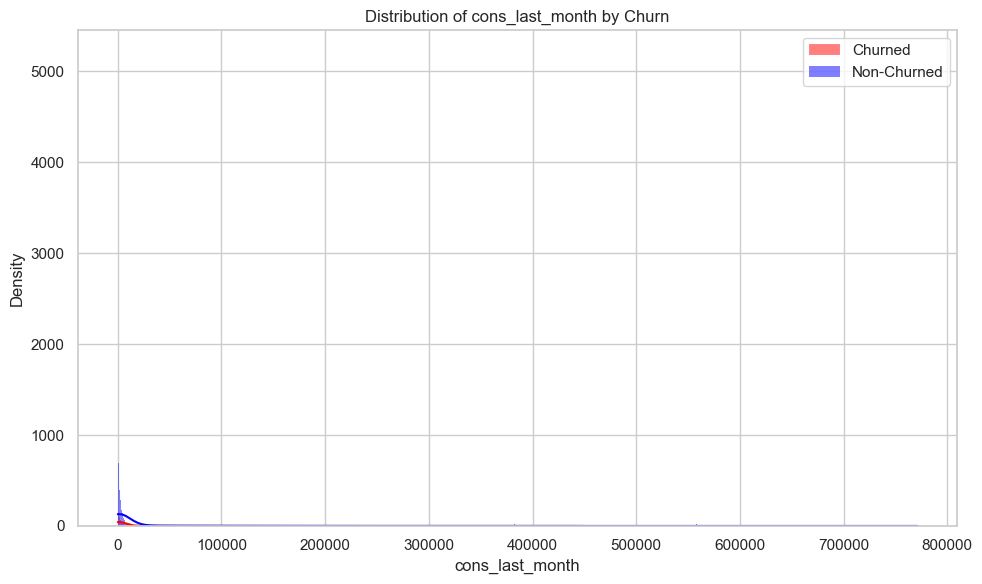

In [20]:
plot_distribution_divided_by_churn(client_df,'cons_last_month')

cons_last_month has 4751  UNIQUE ints64 [electricity consumption of the last month]

Quartile distribution
min: 0.0
25%: 0.0
50%: 792.5
75%: 3383.0
max: 771203.0

Total Sum: 235014480
Mean: 16090.269752156648
Mean (excluding zeros): 24422.16356645537
count NotZero: 9623
count Zero: 4983

## Dates: 

In [21]:
def show_date_distibution(df, date):
    print(f'COLUMN: {date}')
    df[date] = pd.to_datetime(df[date])

    df_year = df[date].dt.year
    df_month = df[date].dt.month

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Plot distribution of years
    sns.countplot(x=df_year, palette='Blues', ax=axes[0], hue=df_year, legend=False)
    axes[0].set_title('Distribution of Years')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Count')

    # Plot distribution of months
    sns.countplot(x=df_month, palette='Greens', ax=axes[1], hue=df_month, legend=False)
    axes[1].set_title('Distribution of Months')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

### date_activ

COLUMN: date_activ


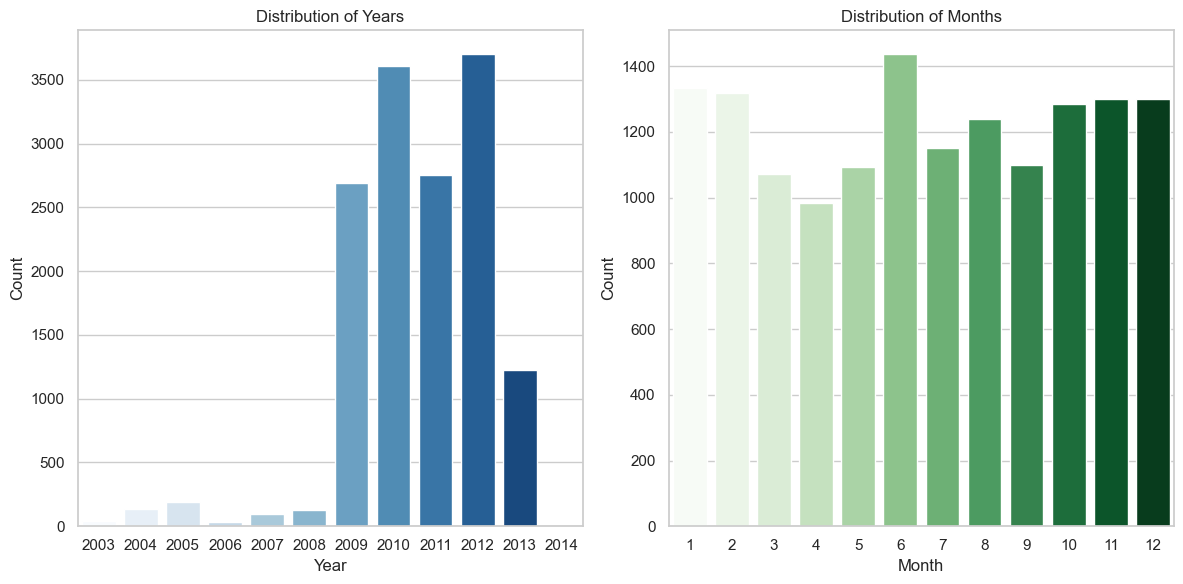

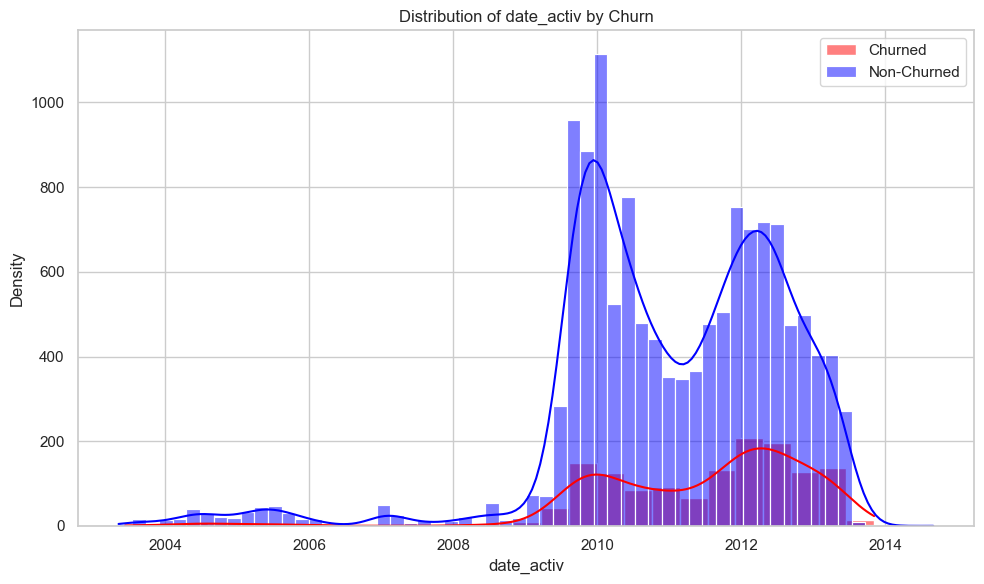

The highest date from 'date_activ' column: 2014-09-01 00:00:00


In [22]:
show_date_distibution(client_df, 'date_activ')
plot_distribution_divided_by_churn(client_df,'date_activ')

latest_date = client_df['date_activ'].max()
print("The highest date from 'date_activ' column:", latest_date)

### date_end

COLUMN: date_end


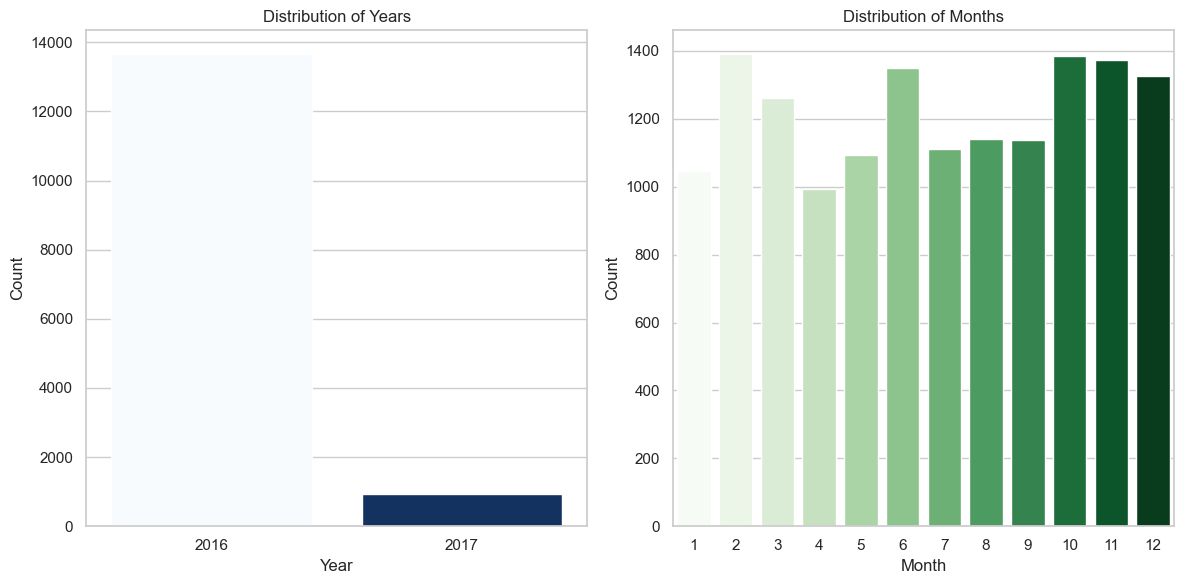

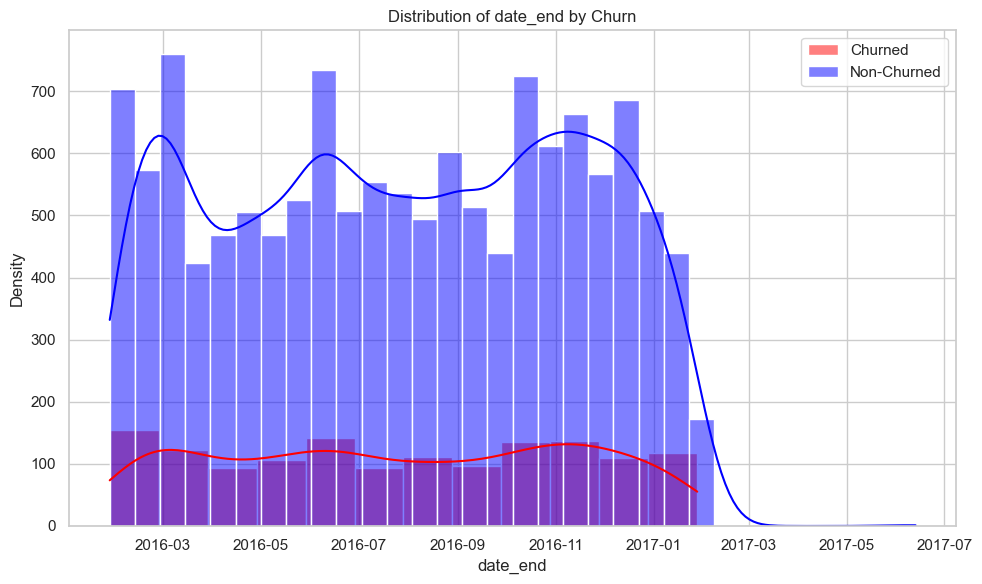

The highest date from 'date_end' column: 2017-06-13 00:00:00


In [23]:
show_date_distibution(client_df, 'date_end')
plot_distribution_divided_by_churn(client_df,'date_end')

latest_date = client_df['date_end'].max()
print("The highest date from 'date_end' column:", latest_date)

### date_modif_prod

COLUMN: date_modif_prod


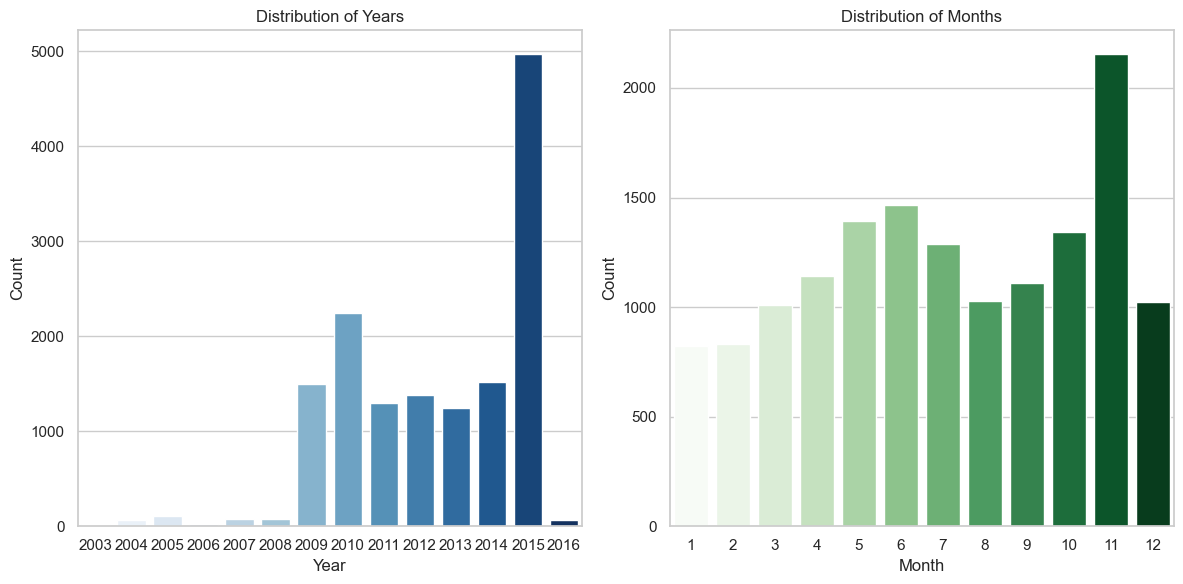

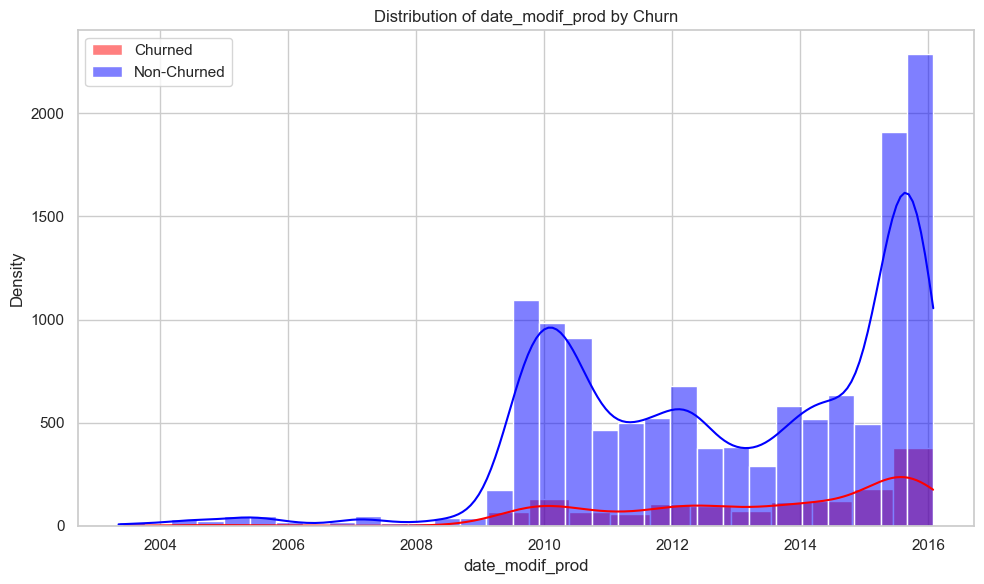

The highest date from 'date_modif_prod' column: 2016-01-29 00:00:00


In [24]:
show_date_distibution(client_df, 'date_modif_prod')
plot_distribution_divided_by_churn(client_df,'date_modif_prod')

latest_date = client_df['date_modif_prod'].max()
print("The highest date from 'date_modif_prod' column:", latest_date)

### date_renewal

COLUMN: date_renewal


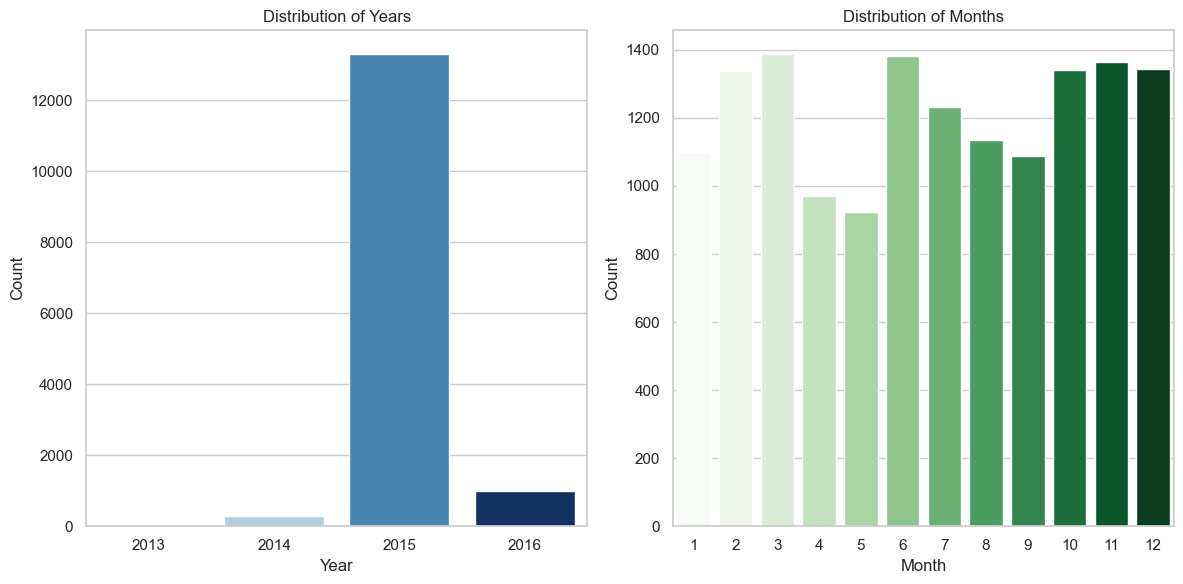

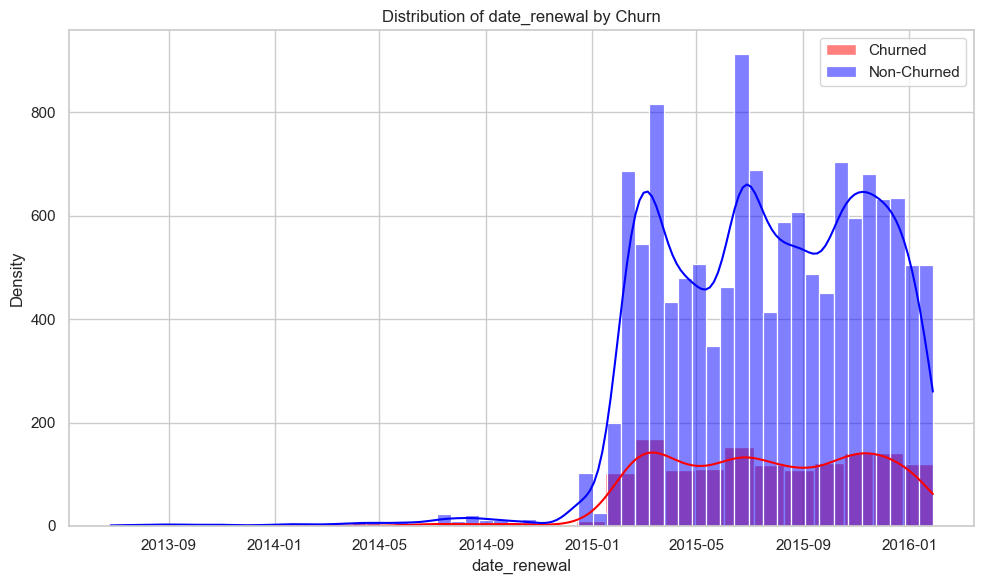

The highest date from 'date_renewal' column: 2016-01-28 00:00:00


In [25]:
show_date_distibution(client_df, 'date_renewal')
plot_distribution_divided_by_churn(client_df,'date_renewal')

latest_date = client_df['date_renewal'].max()
print("The highest date from 'date_renewal' column:", latest_date)


## Forecasts

### forecast_cons_12m

Column: forecast_cons_12m has 13993 unique values in 14606 rows

Samples:
260.71
1999.95
454.33
365.9
366.39

Description:
mean:1868.6148795015747
std: 2387.571530730436
min: 0.0
25%: 494.995
50%: 1112.875
75%: 2401.79
max: 82902.83

Name: forecast_cons_12m, dtype: float64



 ---------------------------------------------
Total Sum: 27292988.930000033
Mean: 1868.614879501577
Mean (excluding zeros): 1908.6006244755267
count NotZero: 14300
count Zero: 306


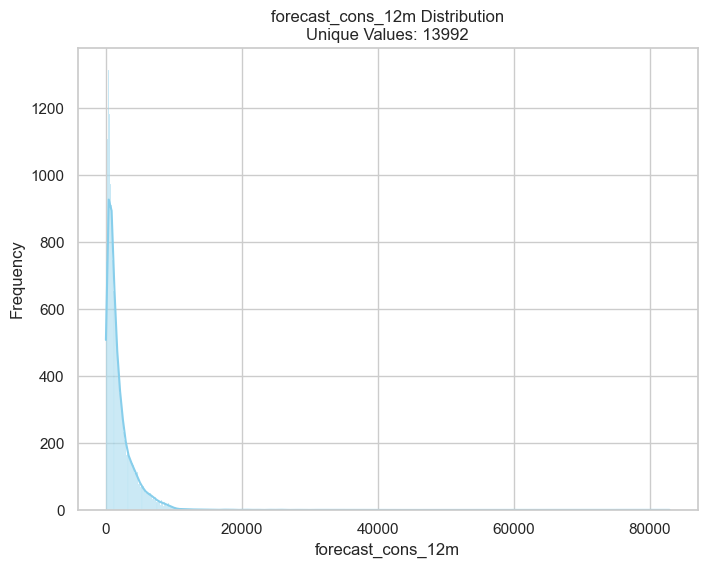

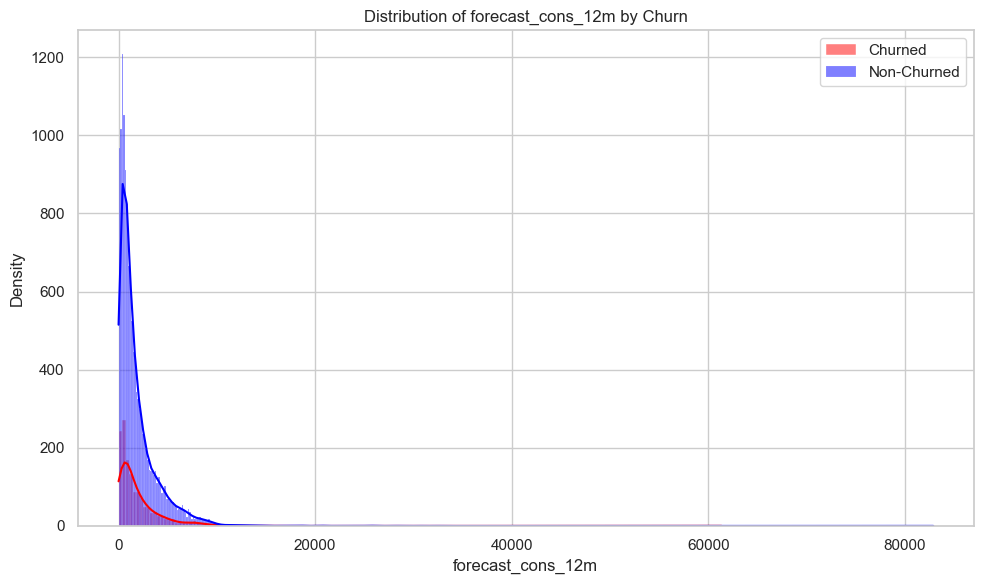

In [26]:
ac = 'forecast_cons_12m'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)
plot_distribution_divided_by_churn(client_df,'forecast_cons_12m')


### forecast_cons_year

Column: forecast_cons_year has 4218 unique values in 14606 rows

Samples:
0
850
0
579
0

Description:
mean:1399.7629056552103
std: 3247.786255199376
min: 0.0
25%: 0.0
50%: 314.0
75%: 1745.75
max: 175375.0

Name: forecast_cons_year, dtype: int64



 ---------------------------------------------
Total Sum: 20444937
Mean: 1399.7629056552103
Mean (excluding zeros): 2417.2306691889335
count NotZero: 8458
count Zero: 6148


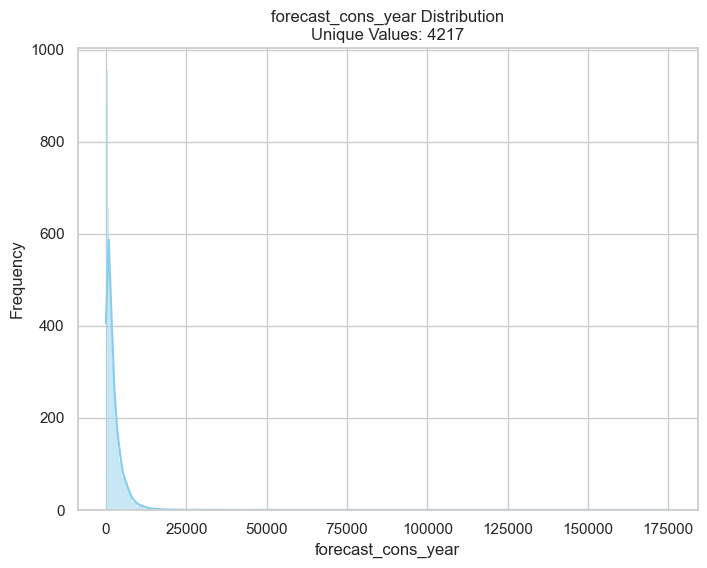

In [27]:
ac = 'forecast_cons_year'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)


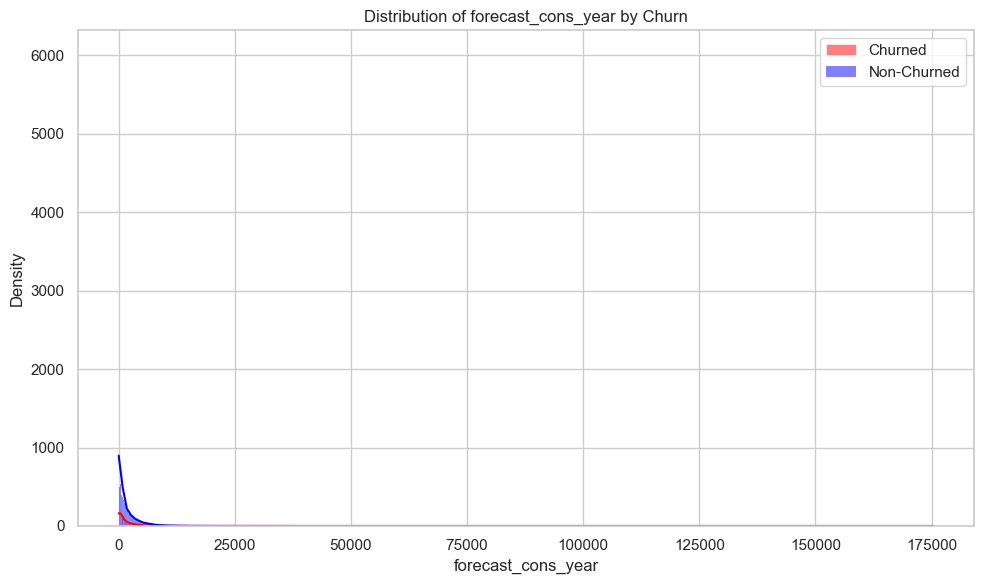

In [28]:
plot_distribution_divided_by_churn(client_df,'forecast_cons_year')

### forecast_discount_energy

Column: forecast_discount_energy has 12 unique values in 14606 rows

 0.0  14094 (96.49%)
30.0  260 (1.78%)
28.0  102 (0.70%)
24.0  83 (0.57%)
22.0  47 (0.32%)
25.0  7 (0.05%)
26.0  5 (0.03%)
19.0  2 (0.01%)
17.0  2 (0.01%)
23.0  2 (0.01%)
10.0  1 (0.01%)
 5.0  1 (0.01%)


Name: forecast_discount_energy, dtype: float64



 ---------------------------------------------
Total Sum: 14120.0
Mean: 0.9667260030124606
Mean (excluding zeros): 27.578125
count NotZero: 512
count Zero: 14094


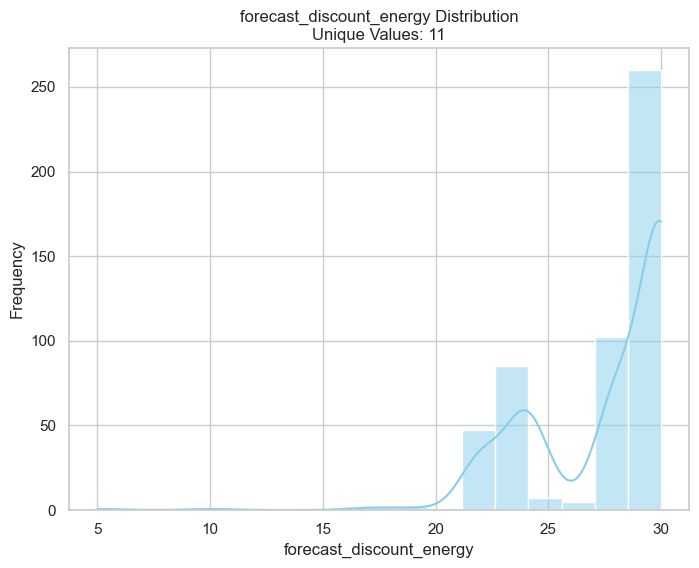

In [29]:
ac = 'forecast_discount_energy'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

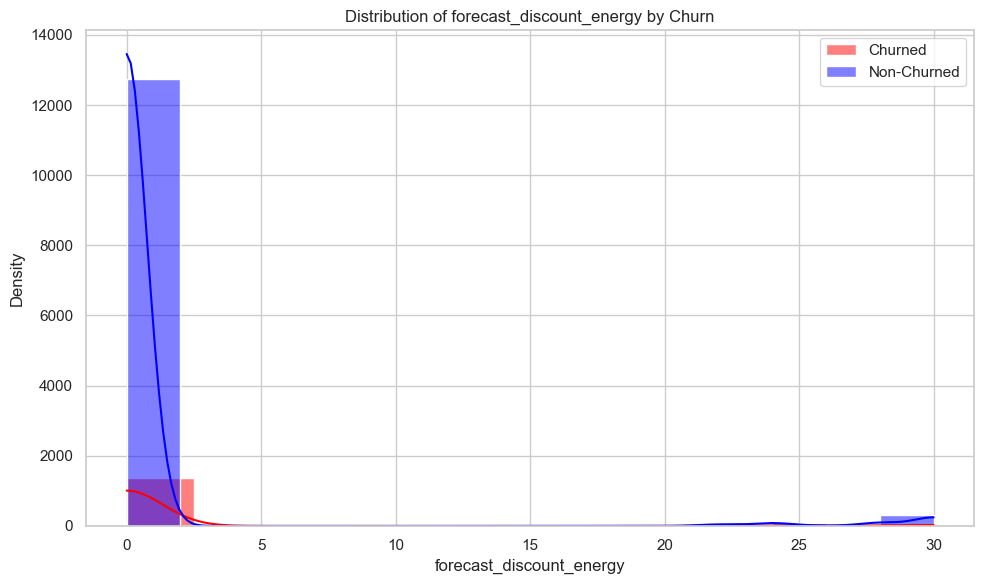

In [30]:
plot_distribution_divided_by_churn(client_df,'forecast_discount_energy')

### forecast_meter_rent_12m

Column: forecast_meter_rent_12m has 3528 unique values in 14606 rows

Samples:
16.46
146.56
16.29
16.41
129.26

Description:
mean:63.08687114884294
std: 66.16578283151385
min: 0.0
25%: 16.18
50%: 18.795
75%: 131.03
max: 599.31

Name: forecast_meter_rent_12m, dtype: float64



 ---------------------------------------------
Total Sum: 921446.840000001
Mean: 63.08687114884301
Mean (excluding zeros): 66.38187738635553
count NotZero: 13881
count Zero: 725


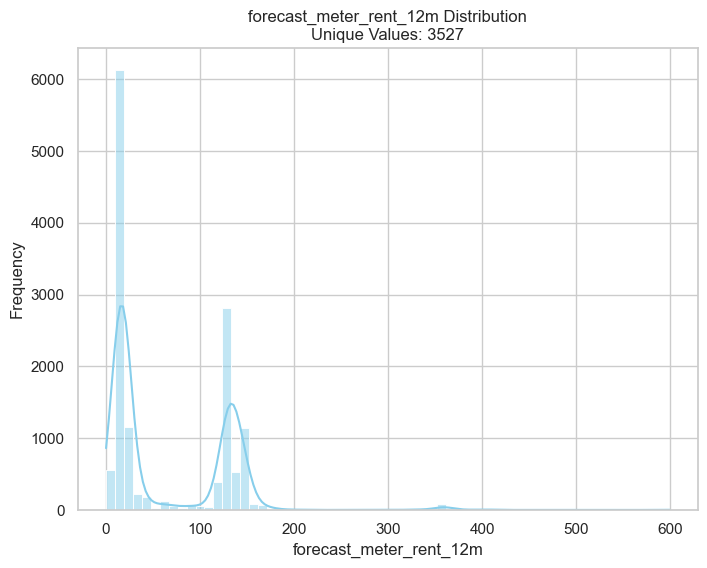

In [31]:
ac = 'forecast_meter_rent_12m'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

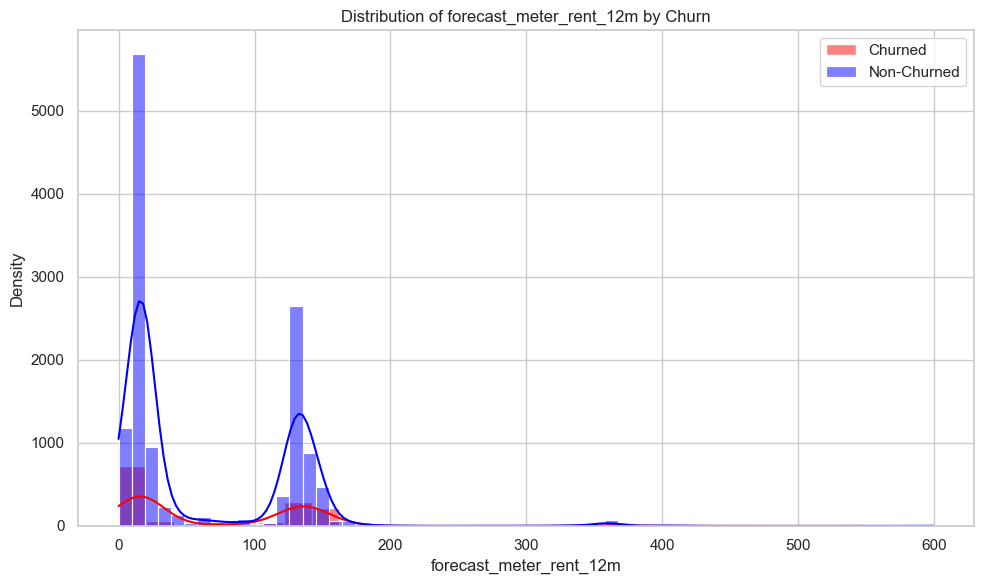

In [32]:
plot_distribution_divided_by_churn(client_df,'forecast_meter_rent_12m')

### forecast_price_energy_off_peak

Column: forecast_price_energy_off_peak has 516 unique values in 14606 rows

Samples:
0.1152369999999999
0.19923
0.1640569999999999
0.141666
0.115174

Description:
mean:0.13728326568533475
std: 0.024622862350857738
min: 0.0
25%: 0.11634
50%: 0.143166
75%: 0.146348
max: 0.273963

Name: forecast_price_energy_off_peak, dtype: float64



 ---------------------------------------------
Total Sum: 2005.1593785999346
Mean: 0.1372832656853303
Mean (excluding zeros): 0.13749035783049468
count NotZero: 14584
count Zero: 22


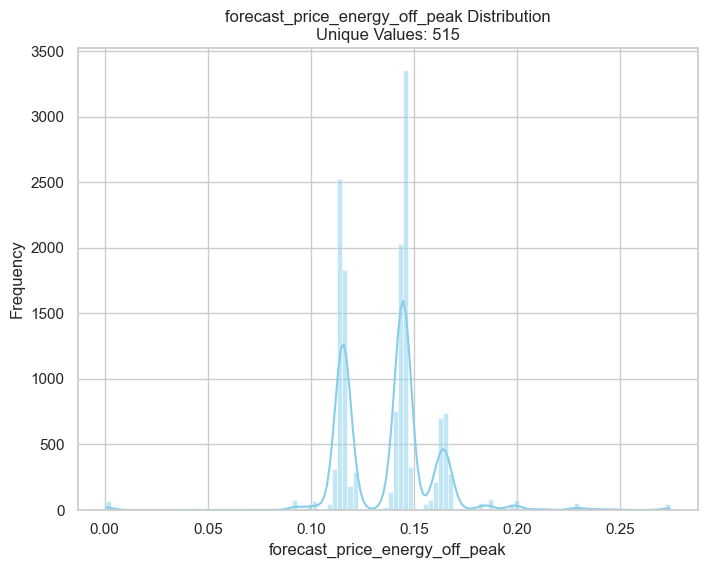

In [33]:
ac = 'forecast_price_energy_off_peak'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

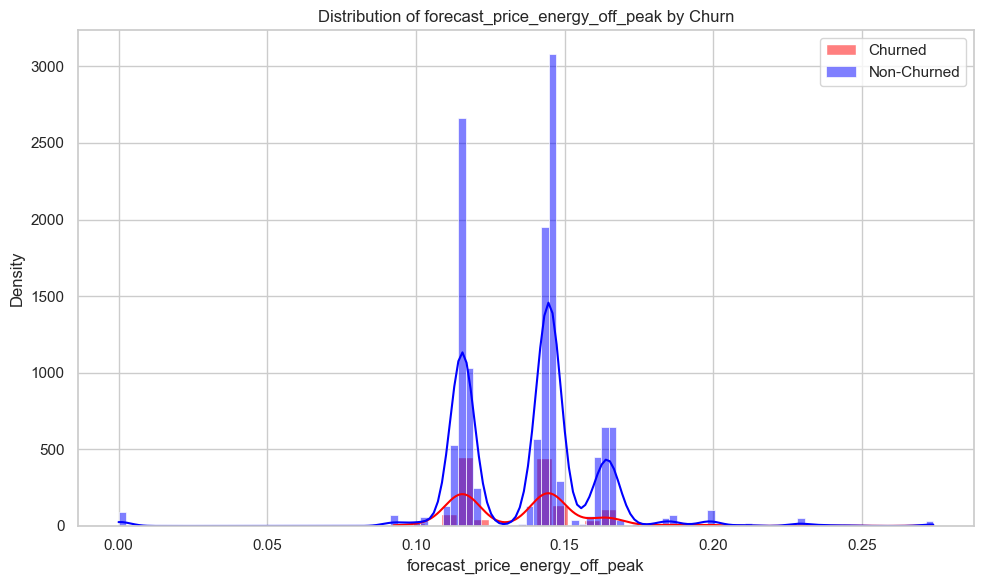

In [34]:
plot_distribution_divided_by_churn(client_df,'forecast_price_energy_off_peak')

### forecast_price_energy_peak

Column: forecast_price_energy_peak has 329 unique values in 14606 rows

Samples:
0.0
0.101397
0.0
0.0
0.0

Description:
mean:0.05049076721895111
std: 0.04903650730528814
min: 0.0
25%: 0.0
50%: 0.084138
75%: 0.098837
max: 0.195975

Name: forecast_price_energy_peak, dtype: float64



 ---------------------------------------------
Total Sum: 737.4681460000236
Mean: 0.05049076721895273
Mean (excluding zeros): 0.09722717811470317
count NotZero: 7585
count Zero: 7021


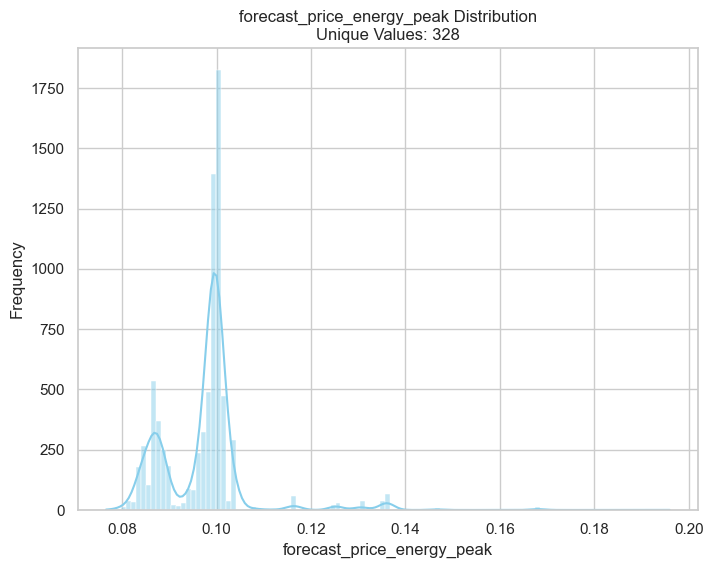

In [35]:
ac = 'forecast_price_energy_peak'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

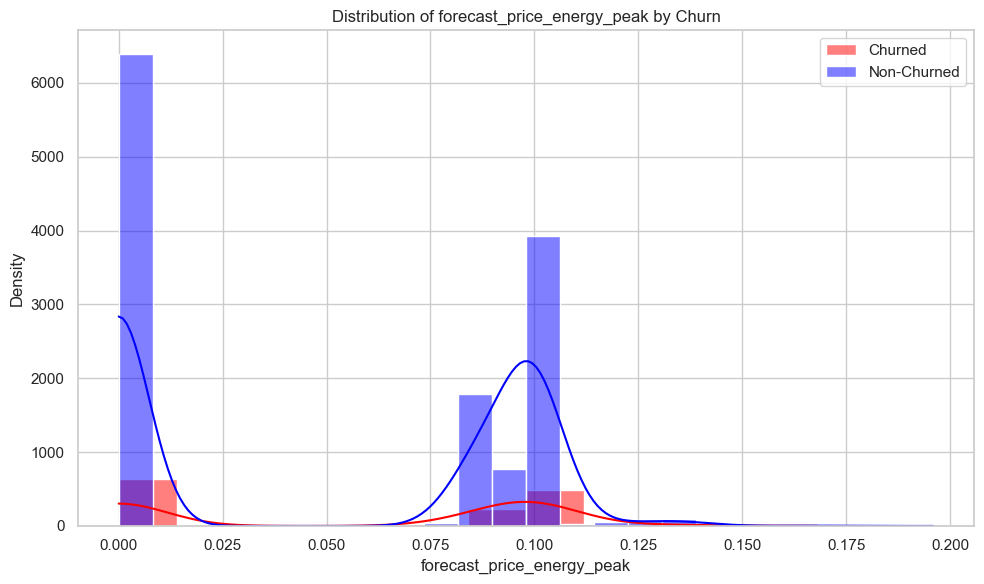

In [36]:
plot_distribution_divided_by_churn(client_df,'forecast_price_energy_peak')

### forecast_price_pow_off_peak

Column: forecast_price_pow_off_peak has 41 unique values in 14606 rows

      44.31137796  6933 (47.47%)
        40.606701  4651 (31.84%)
      45.80687796  697 (4.77%)
      46.30537836  615 (4.21%)
      45.30837756  419 (2.87%)
       41.1052014  302 (2.07%)
       40.9390266  237 (1.62%)
41.27136420000001  160 (1.10%)
      58.99595196  118 (0.81%)
              0.0  94 (0.64%)
      59.17346796  76 (0.52%)
      44.44470996  66 (0.45%)
      59.26637796  42 (0.29%)
      45.81137796  31 (0.21%)
        40.728885  31 (0.21%)
      46.31137836  30 (0.21%)
      45.31137756  26 (0.18%)
      53.28437796  14 (0.10%)
      47.30237796  10 (0.07%)
      47.80087836  8 (0.05%)
      46.70417796  7 (0.05%)
      46.80387756  6 (0.04%)
      46.55462196  5 (0.03%)
       41.7698634  5 (0.03%)
      46.30687836  3 (0.02%)
       41.4375258  2 (0.01%)
       41.6037006  2 (0.01%)
      47.30687796  2 (0.01%)
        37.929294  2 (0.01%)
      59.05128396  1 (0.01%)
       41.7288846  1 (0.01

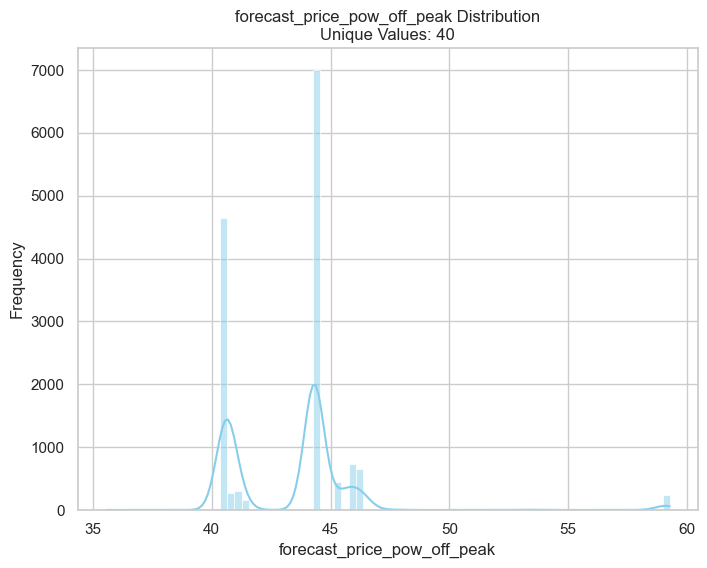

In [37]:
ac = 'forecast_price_pow_off_peak'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

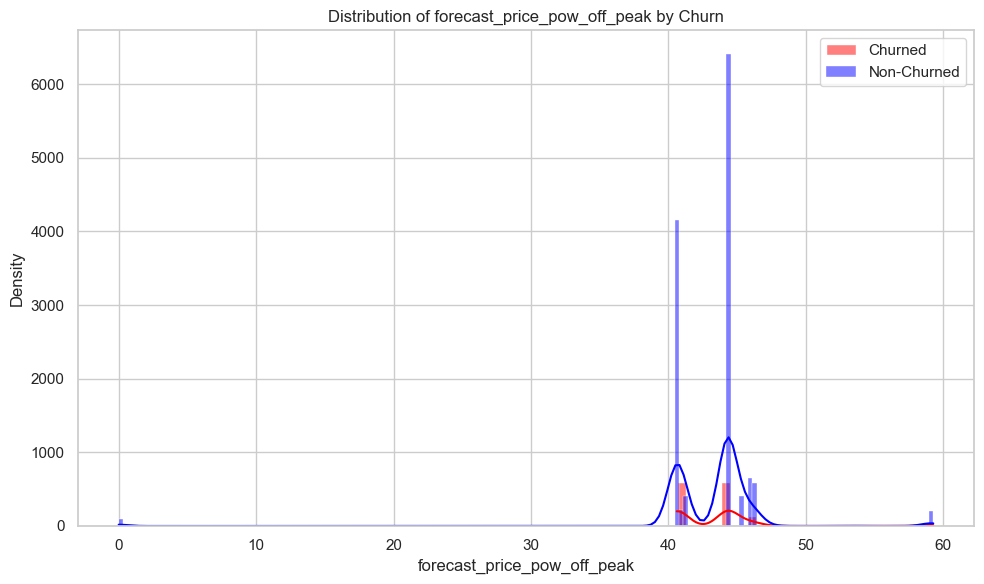

In [38]:
plot_distribution_divided_by_churn(client_df,'forecast_price_pow_off_peak')

### has_gas

In [39]:
ac = 'has_gas'
#Stats
client_df['has_gas'] = client_df['has_gas'].replace({'t': 1.0, 'f': 0.0}).astype(float)
stats_unique_values(client_df, ac)


Column: has_gas has 2 unique values in 14606 rows

0.0  11955 (81.85%)
1.0  2651 (18.15%)


Name: has_gas, dtype: float64



 ---------------------------------------------


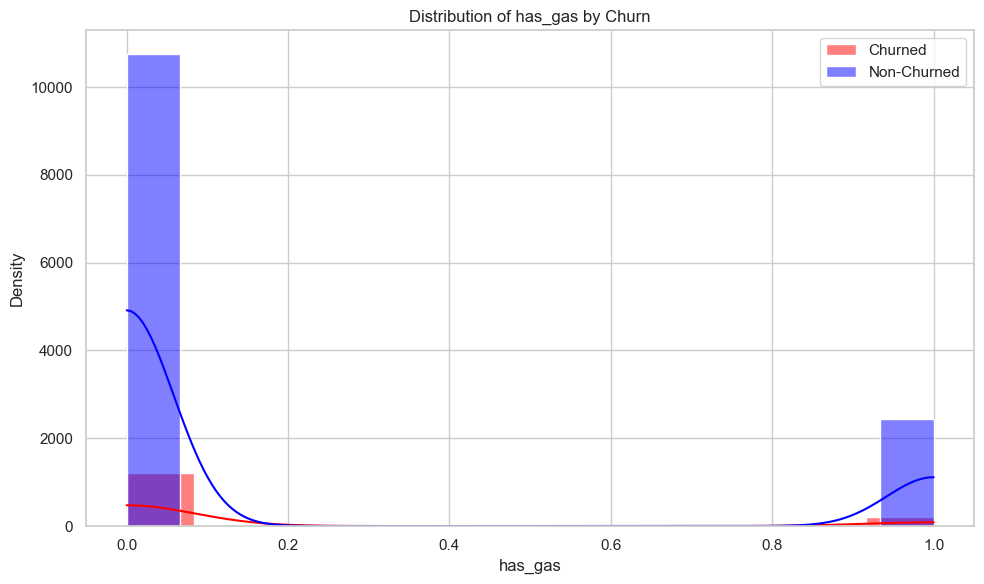

In [40]:
plot_distribution_divided_by_churn(client_df,'has_gas')

### imp_cons

Column: imp_cons has 7752 unique values in 14606 rows

Samples:
0.0
7.51
0.0
62.4
326.3

Description:
mean:152.7868957962481
std: 341.3693655964966
min: 0.0
25%: 0.0
50%: 37.394999999999996
75%: 193.98000000000002
max: 15042.79

Name: imp_cons, dtype: float64



 ---------------------------------------------
Total Sum: 2231605.3999999985
Mean: 152.78689579624802
Mean (excluding zeros): 264.50224013274845
count NotZero: 8437
count Zero: 6169


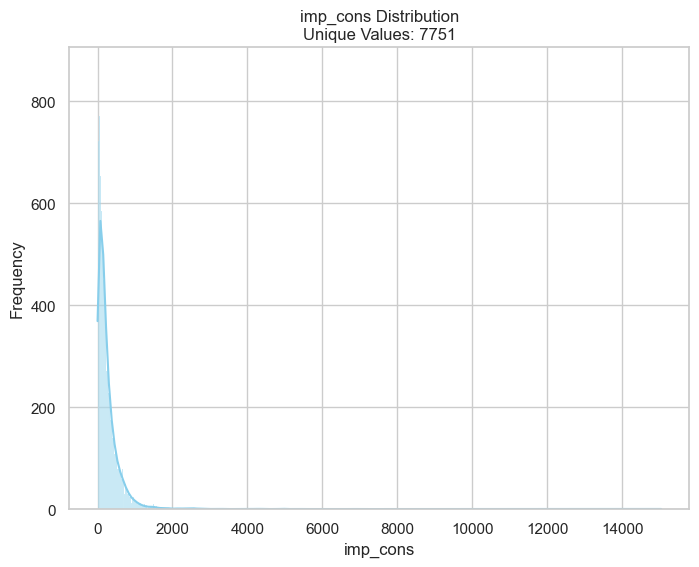

In [41]:
ac = 'imp_cons'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

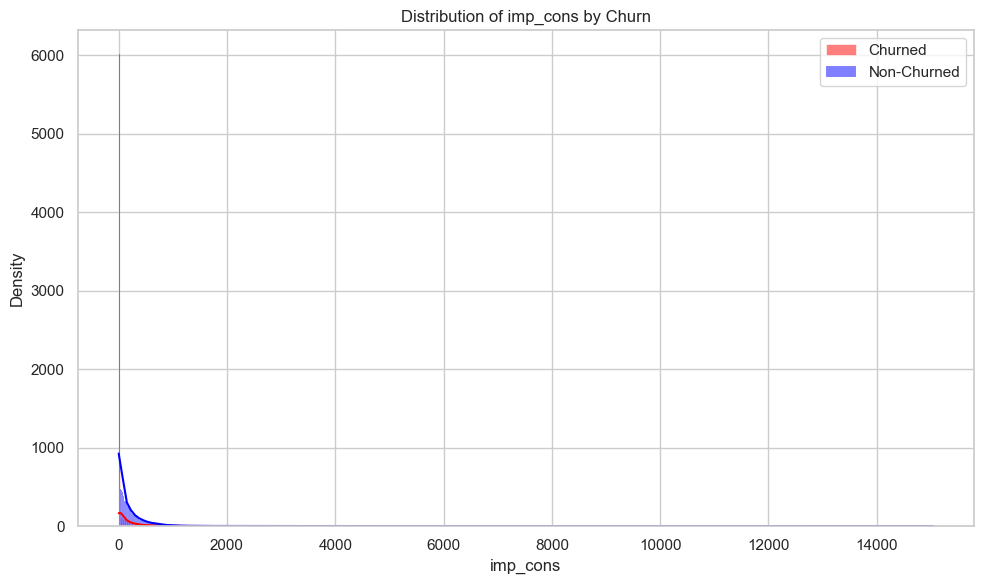

In [42]:
plot_distribution_divided_by_churn(client_df,'imp_cons')

### margin_gross_pow_ele

Column: margin_gross_pow_ele has 2391 unique values in 14606 rows

Samples:
22.89
44.88
28.56
31.08
31.92

Description:
mean:24.56512118307545
std: 20.231171825581104
min: 0.0
25%: 14.28
50%: 21.64
75%: 29.88
max: 374.64

Name: margin_gross_pow_ele, dtype: float64



 ---------------------------------------------
Total Sum: 358798.1600000031
Mean: 24.56512118307566
Mean (excluding zeros): 24.832040971693758
count NotZero: 14449
count Zero: 157


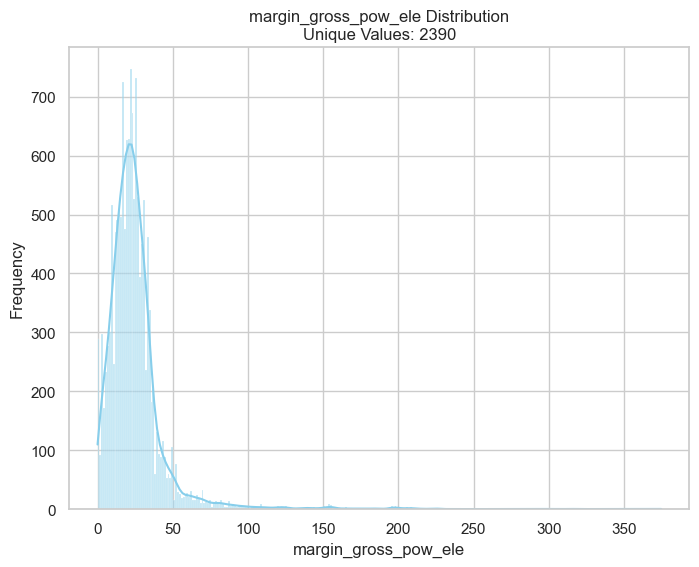

In [43]:
ac = 'margin_gross_pow_ele'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

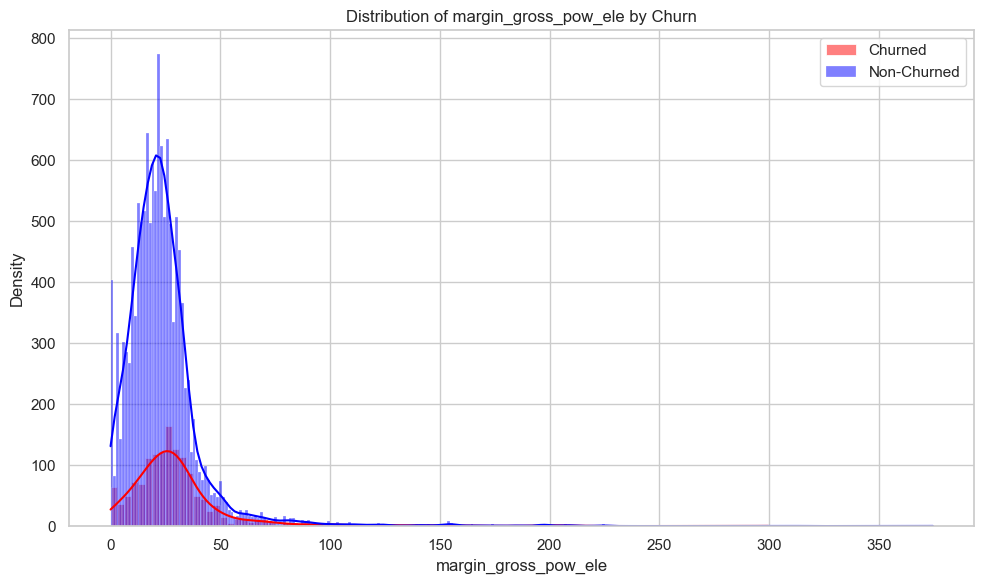

In [44]:
plot_distribution_divided_by_churn(client_df,'margin_gross_pow_ele')

### margin_net_pow_ele

Column: margin_net_pow_ele has 2391 unique values in 14606 rows

Samples:
7.23
4.83
28.14
29.76
29.92

Description:
mean:24.562517458578668
std: 20.230279773176544
min: 0.0
25%: 14.28
50%: 21.64
75%: 29.88
max: 374.64

Name: margin_net_pow_ele, dtype: float64



 ---------------------------------------------
Total Sum: 358760.1300000031
Mean: 24.562517458578878
Mean (excluding zeros): 24.829408955637284
count NotZero: 14449
count Zero: 157


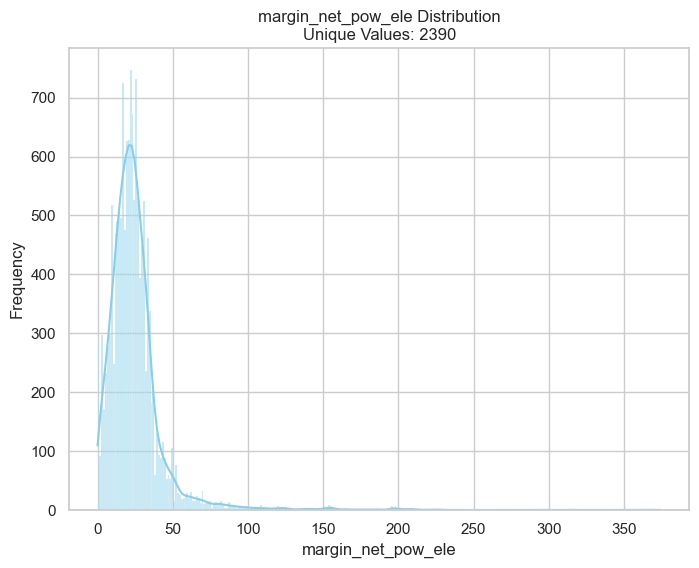

In [45]:
ac = 'margin_net_pow_ele'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

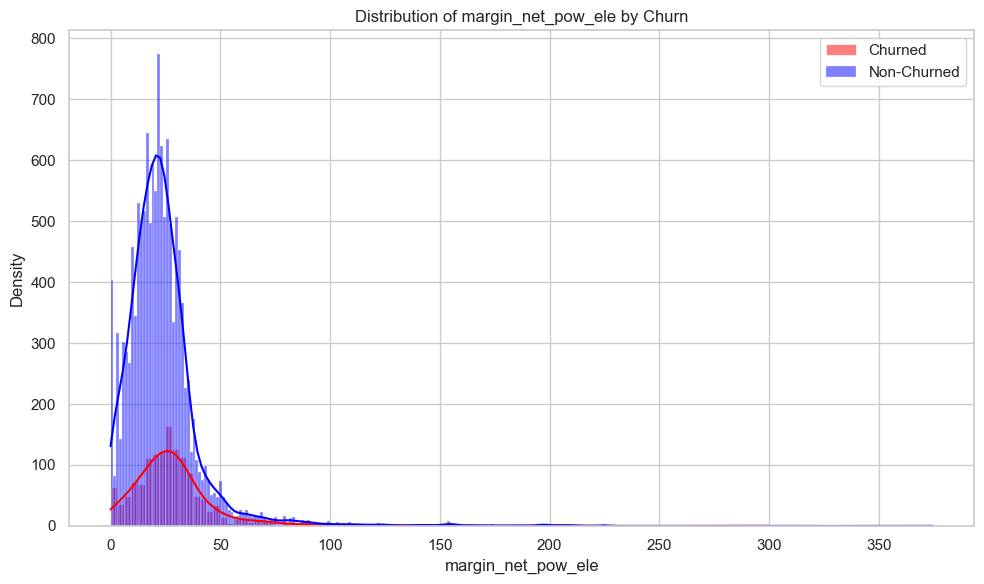

In [46]:
plot_distribution_divided_by_churn(client_df,'margin_net_pow_ele')

### nb_prod_act

Column: nb_prod_act has 10 unique values in 14606 rows

 1  11431 (78.26%)
 2  2445 (16.74%)
 3  523 (3.58%)
 4  150 (1.03%)
 5  31 (0.21%)
 9  11 (0.08%)
 6  8 (0.05%)
 8  4 (0.03%)
10  2 (0.01%)
32  1 (0.01%)


Name: nb_prod_act, dtype: int64



 ---------------------------------------------
Total Sum: 18876
Mean: 1.2923456113925784
Mean (excluding zeros): 1.2923456113925784
count NotZero: 14606
count Zero: 0


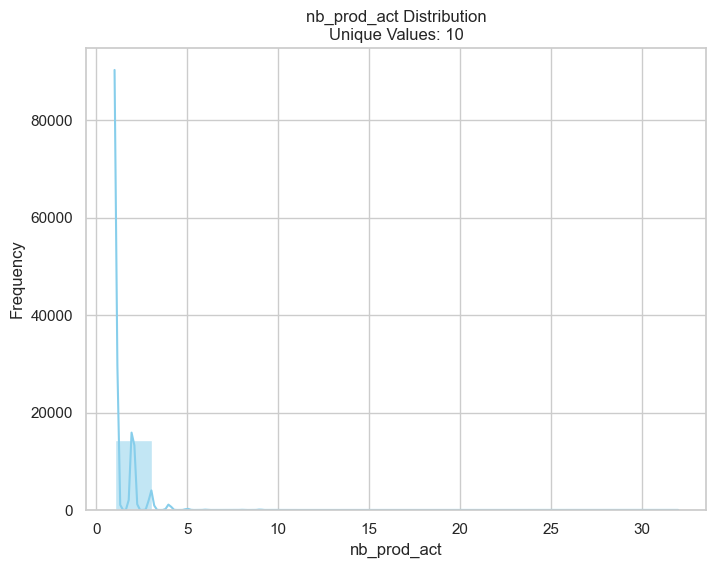

In [47]:
ac = 'nb_prod_act'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

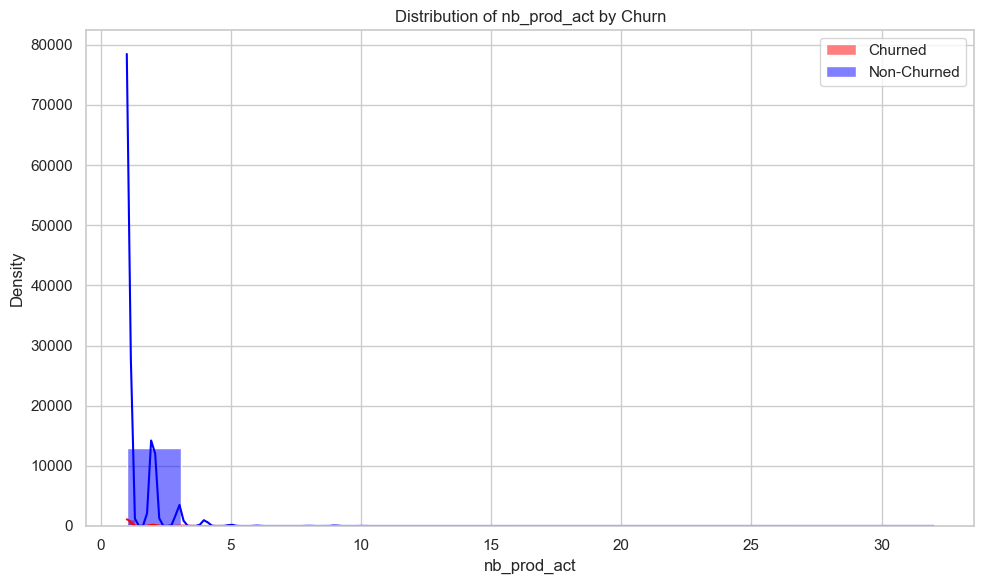

In [48]:
plot_distribution_divided_by_churn(client_df,'nb_prod_act')

### net_margin

Column: net_margin has 11965 unique values in 14606 rows

Samples:
140.8
94.03
307.54
611.49
171.28

Description:
mean:189.26452211419968
std: 311.7981300587642
min: 0.0
25%: 50.7125
50%: 112.53
75%: 243.0975
max: 24570.65

Name: net_margin, dtype: float64



 ---------------------------------------------
Total Sum: 2764397.6099999966
Mean: 189.26452211419942
Mean (excluding zeros): 191.69250468067378
count NotZero: 14421
count Zero: 185


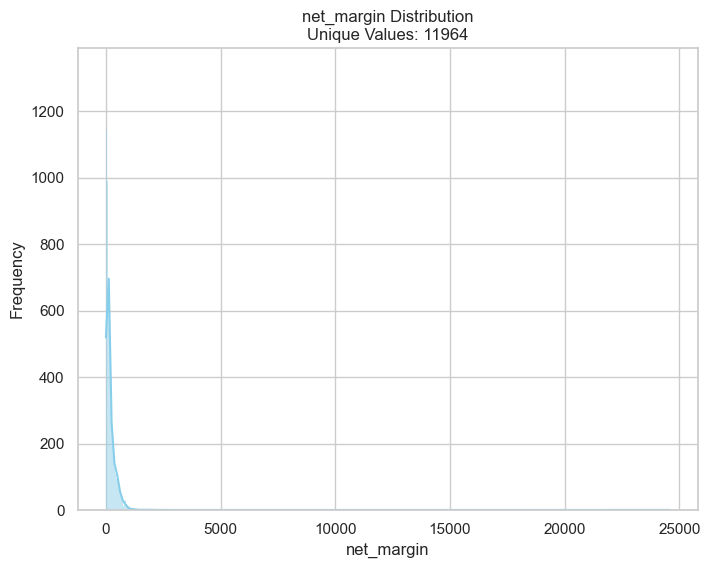

In [49]:
ac = 'net_margin'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

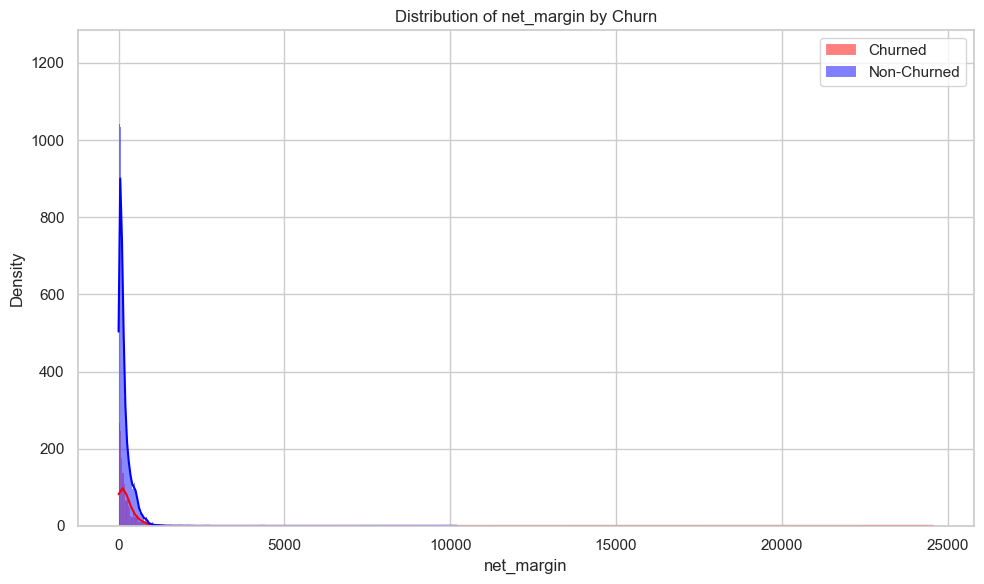

In [50]:
plot_distribution_divided_by_churn(client_df,'net_margin')

### num_years_antig

Column: num_years_antig has 13 unique values in 14606 rows

 6  4769 (32.65%)
 4  3982 (27.26%)
 3  2433 (16.66%)
 5  2317 (15.86%)
 7  509 (3.48%)
11  185 (1.27%)
12  110 (0.75%)
 8  103 (0.71%)
 9  92 (0.63%)
10  81 (0.55%)
13  13 (0.09%)
 2  11 (0.08%)
 1  1 (0.01%)


Name: num_years_antig, dtype: int64



 ---------------------------------------------
Total Sum: 72998
Mean: 4.997809119539915
Mean (excluding zeros): 4.997809119539915
count NotZero: 14606
count Zero: 0


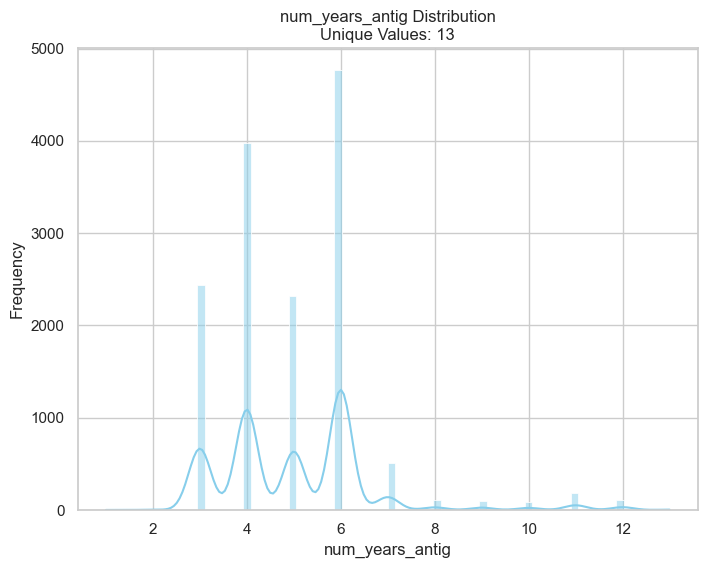

In [51]:
ac = 'num_years_antig'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

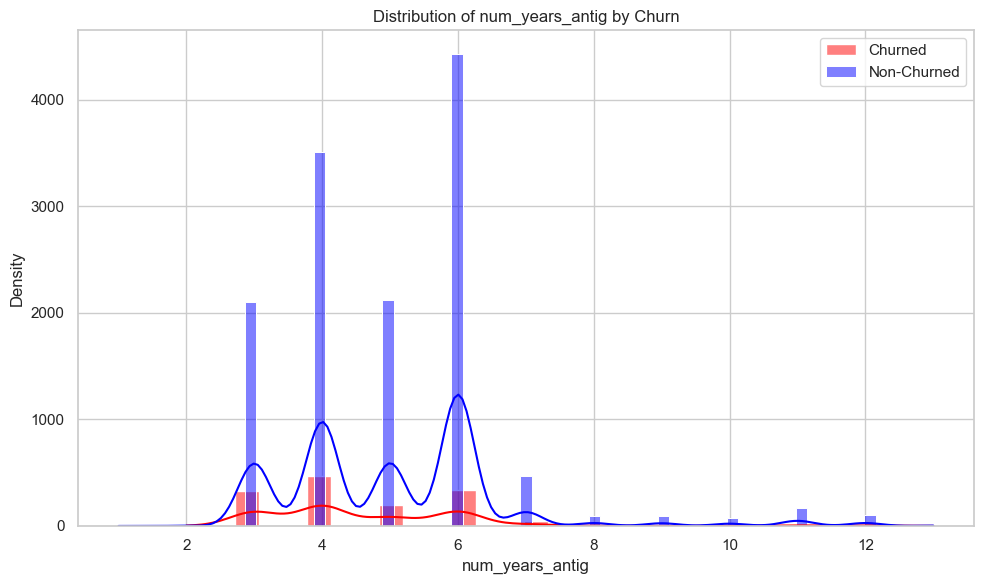

In [52]:
plot_distribution_divided_by_churn(client_df,'num_years_antig')

### origin_up

In [53]:
ac = 'origin_up'
#Stats
stats_unique_values(client_df, ac)

Column: origin_up has 6 unique values in 14606 rows

lxidpiddsbxsbosboudacockeimpuepw  7097 (48.59%)
kamkkxfxxuwbdslkwifmmcsiusiuosws  4294 (29.40%)
ldkssxwpmemidmecebumciepifcamkci  3148 (21.55%)
MISSING                           64 (0.44%)
usapbepcfoloekilkwsdiboslwaxobdp  2 (0.01%)
ewxeelcelemmiwuafmddpobolfuxioce  1 (0.01%)


Name: origin_up, dtype: object



 ---------------------------------------------


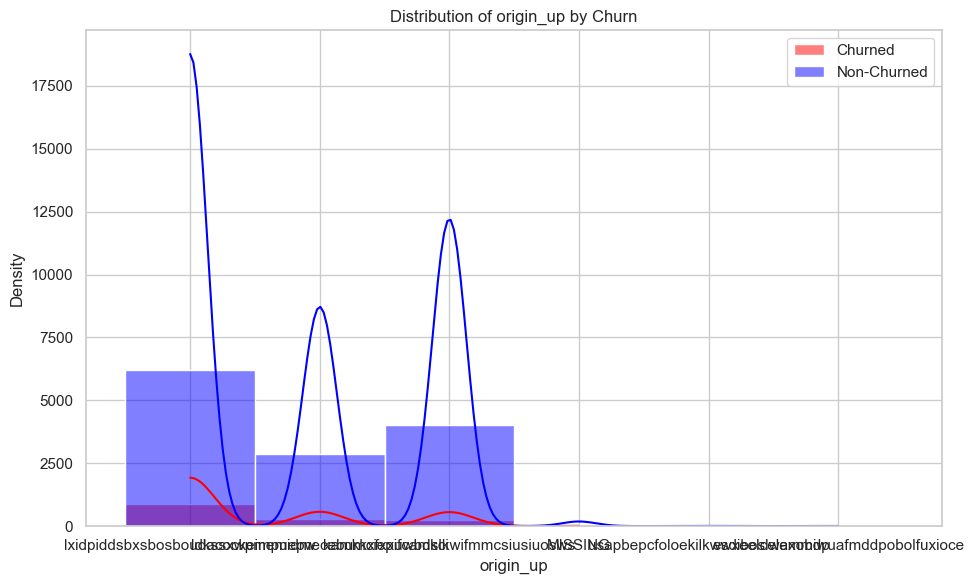

In [54]:
plot_distribution_divided_by_churn(client_df,'origin_up')

### pow_max

Column: pow_max has 698 unique values in 14606 rows

Samples:
15.2
13.856
13.856
20.7
13.2

Description:
mean:18.13513562919348
std: 13.53474337353656
min: 3.3
25%: 12.5
50%: 13.856
75%: 19.1725
max: 320.0

Name: pow_max, dtype: float64



 ---------------------------------------------
Total Sum: 264881.7910000047
Mean: 18.1351356291938
Mean (excluding zeros): 18.1351356291938
count NotZero: 14606
count Zero: 0


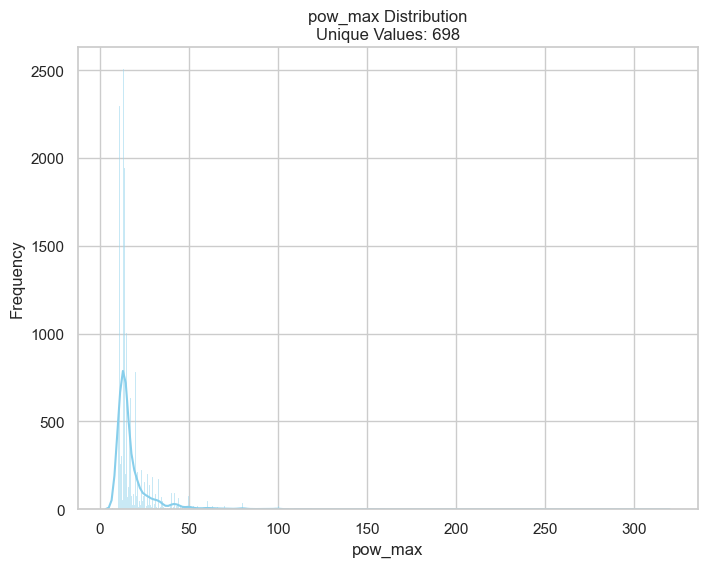

In [55]:
ac = 'pow_max'
#Stats
stats_unique_values(client_df, ac)
value_extraction_numbers(client_df, ac)

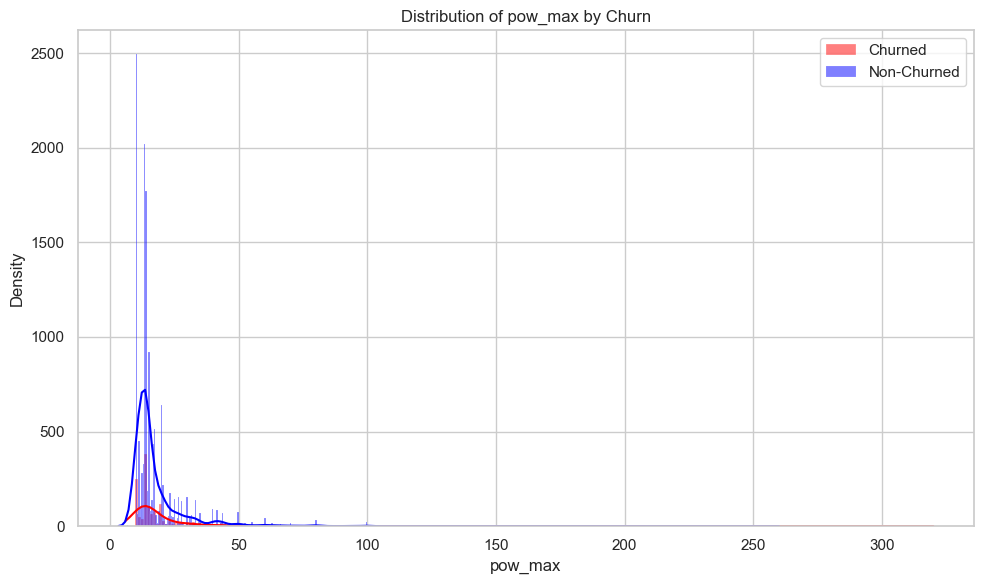

In [56]:
plot_distribution_divided_by_churn(client_df,'pow_max')

### churn

In [57]:
ac = 'churn'
#Stats
stats_unique_values(client_df, ac)

Column: churn has 3 unique values in 14606 rows

0.0  13186 (90.28%)
1.0  1419 (9.72%)


Name: churn, dtype: float64



 ---------------------------------------------


---

# Price EDA

In [58]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [59]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [60]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [61]:
# Get Column names
column_names = return_column_names(price_df)
print(column_names)

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')


### id

In [62]:
ac = 'id'
#Stats
stats_unique_values(price_df, ac)

Column: id has 16096 unique values in 193002 rows

Samples:
3acd8993faab6c52e9512f131644206c
4464846f014b84194cda03b58dc7fc0f
d519ba0a24048cfc9589b59c6673ab70
16c563fa364d99b0221ae6098603de60
141c00dc83ed50b68dfa15eec77f895a

The column is not numeric.

Name: id, dtype: object



 ---------------------------------------------


### price_date

COLUMN: price_date


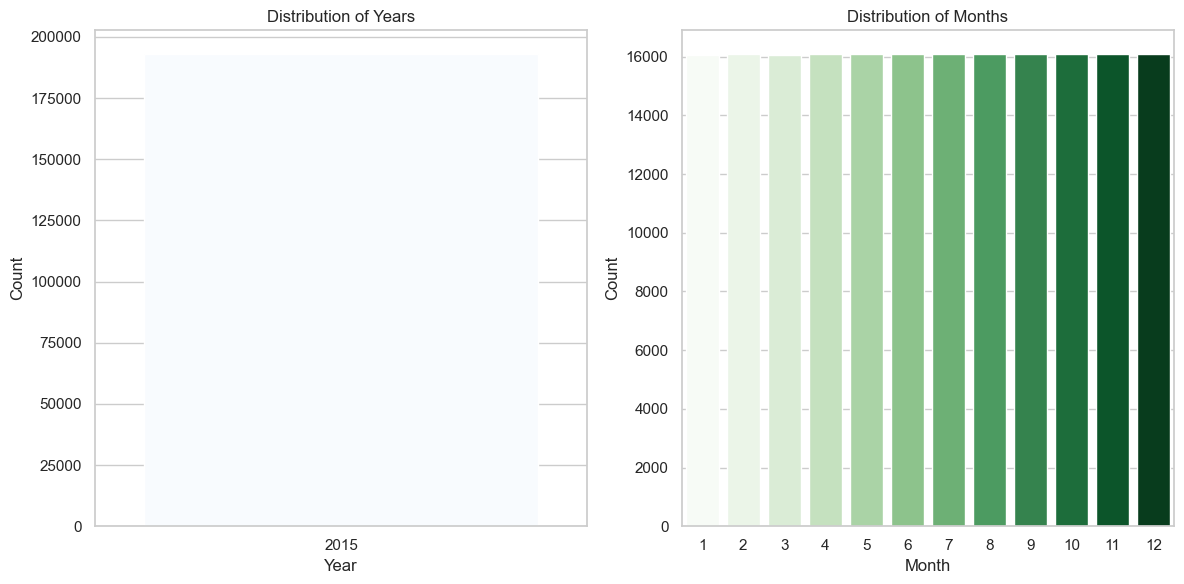

In [63]:
ac = 'price_date'
#Stats
show_date_distibution(price_df, 'price_date')

### price_off_peak_var

Column: price_off_peak_var has 1853 unique values in 193002 rows

Samples:
0.169629
0.125252
0.1244789999999999
0.117093
0.12564

Description:
mean:0.14102697259505084
std: 0.02503240690701826
min: 0.0
25%: 0.125976
50%: 0.146033
75%: 0.151635
max: 0.2807

Name: price_off_peak_var, dtype: float64



 ---------------------------------------------
Total Sum: 27218.487764780737
Mean: 0.14102697259500283
Mean (excluding zeros): 0.14128024958880459
count NotZero: 192656
count Zero: 346


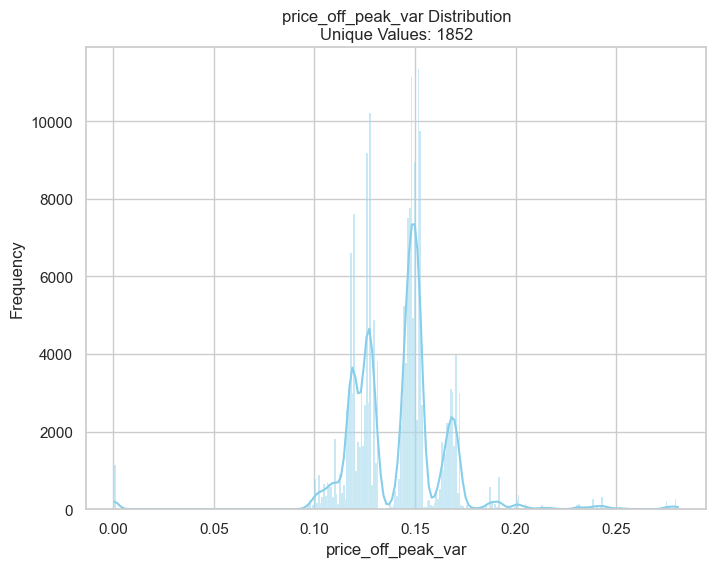

In [64]:
ac = 'price_off_peak_var'
#Stats
stats_unique_values(price_df, ac)
value_extraction_numbers(price_df, ac)

### price_peak_var

Column: price_peak_var has 1189 unique values in 193002 rows

Samples:
0.106122
0.0
0.102232
0.130578
0.132895

Description:
mean:0.05463039689873681
std: 0.04992426204172699
min: 0.0
25%: 0.0
50%: 0.085483
75%: 0.101673
max: 0.229788

Name: price_peak_var, dtype: float64



 ---------------------------------------------
Total Sum: 10543.775862249197
Mean: 0.054630396898732635
Mean (excluding zeros): 0.0992822585899171
count NotZero: 106200
count Zero: 86802


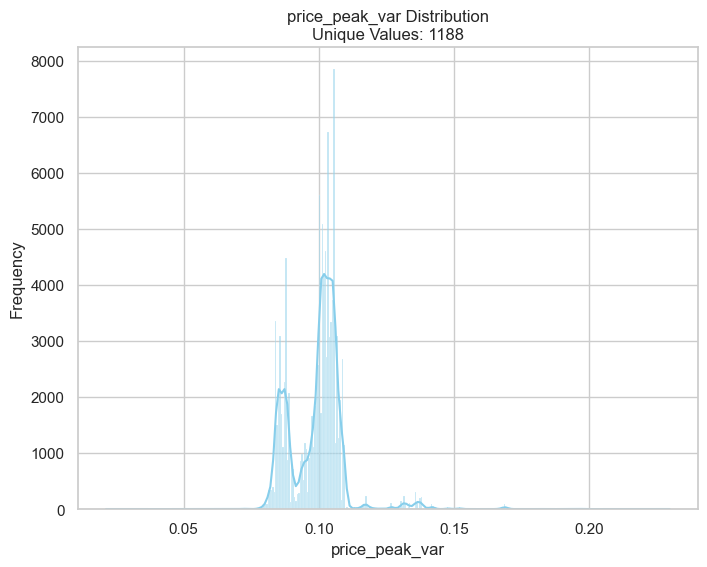

In [65]:
ac = 'price_peak_var'
#Stats
stats_unique_values(price_df, ac)
value_extraction_numbers(price_df, ac)

### price_mid_peak_var

Column: price_mid_peak_var has 711 unique values in 193002 rows

Samples:
0.0
0.0
0.0
0.0
0.0

Description:
mean:0.030496007458938247
std: 0.036298008142279486
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.072558
max: 0.114102

Name: price_mid_peak_var, dtype: float64



 ---------------------------------------------
Total Sum: 5885.790431589727
Mean: 0.030496007458936835
Mean (excluding zeros): 0.07341820217031393
count NotZero: 80168
count Zero: 112834


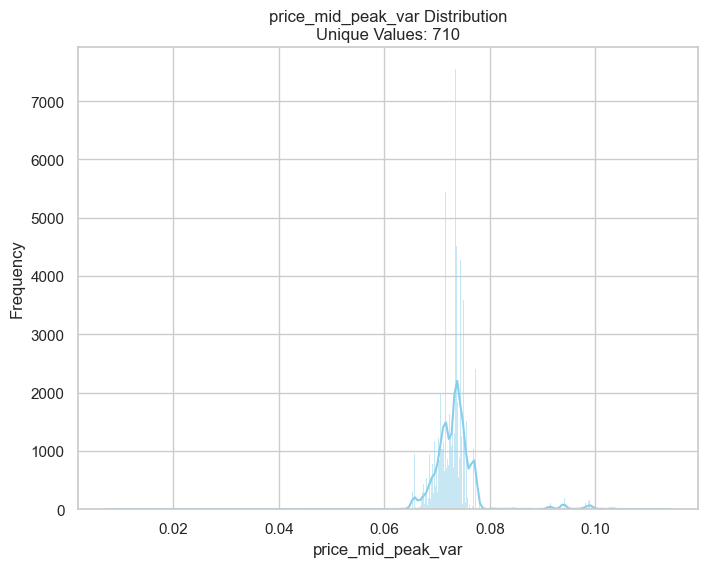

In [66]:
ac = 'price_mid_peak_var'
#Stats
stats_unique_values(price_df, ac)
value_extraction_numbers(price_df, ac)

### price_off_peak_fix

Column: price_off_peak_fix has 66 unique values in 193002 rows

      44.44470996  38491 (19.94%)
      44.26692996  34768 (18.01%)
        40.728885  33151 (17.18%)
      44.26693116  32718 (16.95%)
40.56596939999999  22476 (11.65%)
        40.565973  13551 (7.02%)
      59.17346796  4092 (2.12%)
      58.93677408  2477 (1.28%)
      58.93677996  1590 (0.82%)
              0.0  1490 (0.77%)
      45.76092996  1325 (0.69%)
      45.94470996  1324 (0.69%)
       41.2288854  965 (0.50%)
      45.76093116  886 (0.46%)
      46.44471036  705 (0.37%)
       41.0639694  538 (0.28%)
      41.06396988  519 (0.27%)
      45.44470956  335 (0.17%)
       41.0622186  303 (0.16%)
      59.20692996  284 (0.15%)
       41.3955522  226 (0.12%)
      59.44470996  164 (0.08%)
      59.20693116  138 (0.07%)
      53.44470996  77 (0.04%)
      53.23092996  58 (0.03%)
      39.80040816  50 (0.03%)
        40.728888  44 (0.02%)
      53.23093116  36 (0.02%)
        37.891254  19 (0.01%)
        38.043426  1

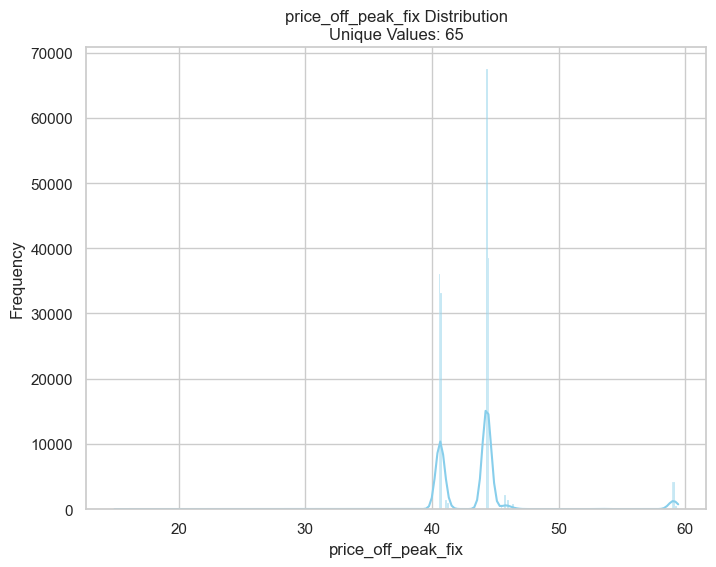

In [67]:
ac = 'price_off_peak_fix'
#Stats
stats_unique_values(price_df, ac)
value_extraction_numbers(price_df, ac)

### price_peak_fix

Column: price_peak_fix has 31 unique values in 193002 rows

        0.0  112998 (58.55%)
24.43733004  33144 (17.17%)
24.33958068  22477 (11.65%)
24.33957804  13554 (7.02%)
  36.490689  4092 (2.12%)
36.34472628  2472 (1.28%)
  36.344721  1588 (0.82%)
24.93733044  965 (0.50%)
24.83758644  537 (0.28%)
24.83758116  517 (0.27%)
24.77066364  303 (0.16%)
25.10399724  226 (0.12%)
  24.437328  40 (0.02%)
19.58665404  13 (0.01%)
25.32126204  12 (0.01%)
19.50830604  11 (0.01%)
  36.490692  10 (0.01%)
  36.392937  7 (0.00%)
 9.46628604  5 (0.00%)
36.39293964  5 (0.00%)
  24.339576  4 (0.00%)
 9.77493204  4 (0.00%)
   9.466284  3 (0.00%)
24.61261224  3 (0.00%)
   0.069113  3 (0.00%)
19.54986408  2 (0.00%)
25.43732964  2 (0.00%)
 0.09555567  2 (0.00%)
25.27066284  1 (0.00%)
25.60399644  1 (0.00%)
24.61261404  1 (0.00%)


Name: price_peak_fix, dtype: float64



 ---------------------------------------------
Total Sum: 2050236.1685276933
Mean: 10.62287524755025
Mean (excluding zeros): 25.6266707730575

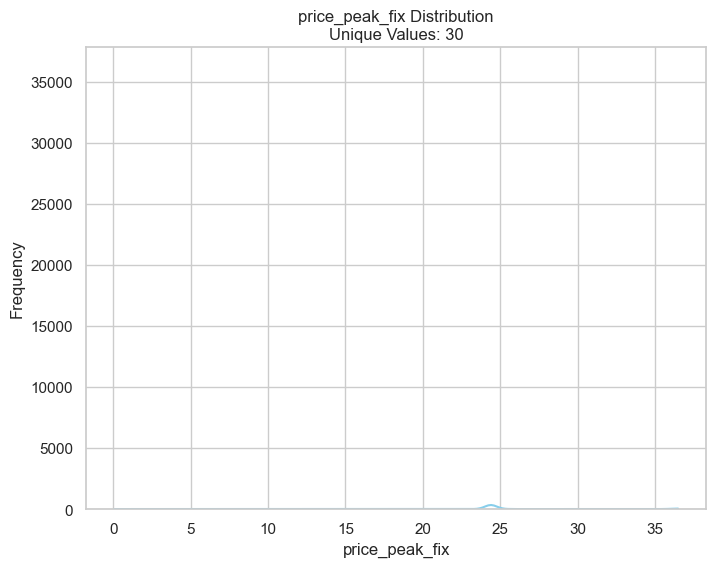

In [68]:
ac = 'price_peak_fix'
#Stats
stats_unique_values(price_df, ac)
value_extraction_numbers(price_df, ac)

### price_mid_peak_fix

Column: price_mid_peak_fix has 28 unique values in 193002 rows

        0.0  112996 (58.55%)
16.29155496  33156 (17.18%)
16.22638872  22477 (11.65%)
16.22638296  13554 (7.02%)
 8.36773104  4092 (2.12%)
 8.33426016  2477 (1.28%)
 8.33426304  1590 (0.82%)
16.79155536  965 (0.50%)
16.72439136  539 (0.28%)
16.72438908  517 (0.27%)
16.62488856  303 (0.16%)
16.95822216  226 (0.12%)
   16.29156  40 (0.02%)
14.33417796  13 (0.01%)
14.27684196  11 (0.01%)
   8.367732  10 (0.01%)
 8.30255904  7 (0.00%)
    6.92775  5 (0.00%)
  8.3025648  5 (0.00%)
 6.51662196  4 (0.00%)
   6.927756  3 (0.00%)
 16.4084058  3 (0.00%)
13.03324392  2 (0.00%)
17.29155456  2 (0.00%)
  16.226388  2 (0.00%)
17.12488776  1 (0.00%)
16.40841096  1 (0.00%)
17.45822136  1 (0.00%)


Name: price_mid_peak_fix, dtype: float64



 ---------------------------------------------
Total Sum: 1237139.800328276
Mean: 6.40998435419465
Mean (excluding zeros): 15.46308777252051
count NotZero: 80006
count Zero: 112996


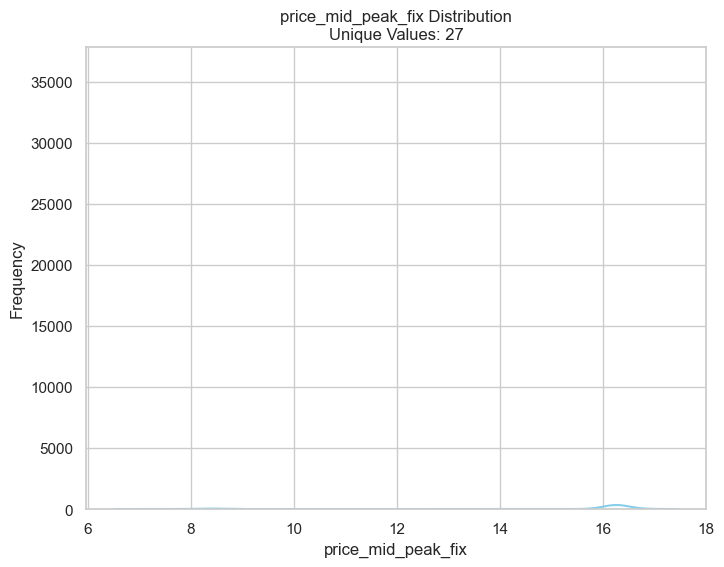

In [69]:
ac = 'price_mid_peak_fix'
#Stats
stats_unique_values(price_df, ac)
value_extraction_numbers(price_df, ac)



---

# EDA

### client_data.csv

1. `id` [client company identifier] UNIQUE:str

is UNIQUE and is shared with price_df.

2. `channel_sales` [code of the sales channel] UNIQUE(8):str 

We have 8 Unique values as sales channels. Not Equal distribution.

3. `cons_12m` [electricity consumption of the past 12 months] CONTINUOS:int64

The electricity consumption in the past year. 

4. `cons_gas_12m` [gas consumption of the past 12 months] CONTINUOS:int64

The Gas consumption in the past year. Lots of zeros. Meaning some clients only use electricity.

5. `cons_last_month` [electricity consumption of the last month] CONTINUOS:int64

Last Month Electricity consumption.

6. `date_activ` [date of activation of the contract] datetime

Values: 2003-2014, last date is 2014-09-13. Months are equally distribuited.

7.	`date_end` [registered date of the end of the contract] datetime

Values: 2016-2017, last contract end date is 2017-06-13. Months are equally distribuited.

8.	`date_modif_prod` [date of the last modification of the product] datetime

Values: 2003-2016, most:2010+. Contains the last modification of the plan. Months distibution peaks: 4-5-6-7, 10-11 last date recorded is 2016-01-29.

9. `date_renewal` [date of the next contract renewal] datetime

Values: 2013-2016, most dates are: 2015+, distr peak: 2015. Months are equally distribuited. Last date 2016-01-28.

10.	`forecast_cons_12m` [forecasted electricity consumption for next 12mo] CONTINUOS:int

Forecast electricity consumption NEXT 12 MONTHS. Distribution: Skewed <Low.

11. `forecast_cons_year` [forecasted electricity consumption for the next calendar year] CONTINUOS:int64

Forecast electricity consumption NEXT CALENDAR YEAR. Distribution: Skewed <Low.

12.	`forecast_discount_energy` [forecasted value of current discount] UNIQUE(12):float64

Forecast of CURRENT discount. 0 to 30 % of discount.

13.	`forecast_meter_rent_12m` [forecasted bill of meter rental for the next 2 months] CONTINUOS:float64

14.	`forecast_price_energy_off_peak` [forecasted energy price for 1st period (off peak)] CONTINUOS:float64

15.	`forecast_price_energy_peak` [forecasted energy price for 2nd period (peak)] CONTINUOS:float64

16.	`forecast_price_pow_off_peak` [forecasted power price for 1st period (off peak)] UNIQUE(41):float64

17.	`has_gas` [indicated if client is also a gas client] UNIQUE(2):float64

If client has GAS option, (0(81.85%)  -  1(18.15%)).

18.	`imp_cons` [current paid consumption] CONTINUOS:float64

Current CONSUMPTION. Distribution: Skewed <Low.

19.	`margin_gross_pow_ele` [gross margin on power subscription] CONTINUOS:float64

GROSS Margin on power subscription %. Distribution: Skewed <Low.

20.	`margin_net_pow_ele` [net margin on power subscription] CONTINUOS:float64

NET Margin on power subscription %. Distribution: Skewed <Low.

21.	`nb_prod_act` [number of active products and services] UNIQUE(10):int

Active Products in the Subscription. Distribution: Skewed <Low.

22.	`net_margin` [total net margin] CONTINUOS:float64

NET Margin TOTAL. Distribution: Skewed <Low.

23.	`num_years_antig` [antiquity of the client (in number of years)] UNIQUE(13):int64

Year since ID is CLIENT. Distribution peak: 2-4-6.

24.	`origin_up` [code of the electricity campaign the customer first subscribed to] UNIQUE(6):str

CLIENT Origin.

25.	`pow_max` [subscribed power] CONTINUOS(698):float64

MAX Electrical Power.

26.	`churn` [has the client churned over the next 3 months] float64 (0(90.28%)  -  1(9.72%))

If the client CHURNED in the last 3 Months.



### price_data.csv

1.	`id` [client company identifier] UNIQUE:str

ID price_data is equal to client_data

2.	`price_date` [reference date] datetime64

Price reference date year – month.  Only one year: 2015, Equal month distribution.

3.	`price_off_peak_var` [price of energy for the 1st period (off peak)] CONTINUOS:float64

VARIABLE Price OFF PEAK. Distribuation peak: 0,1-0,15-0,2.

4.	`price_peak_var` [price of energy for the 2nd period (peak)] CONTINUOS:float64

VARIABLE Price PEAK. Distribution peaks at 0,1.

5.	`price_mid_peak_var` [price of energy for the 3rd period (mid peak)] CONTINUOS:float64

VARIABLE Price MID PEAK. Price variation between: 44-59.

6.	`price_off_peak_fix` [price of power for the 1st period (off peak)] CONTINUOS:float64

FIXED Price OFF PEAK. Price variations: 0,0-60. Distibuation peak: 40-50.

7.	`price_peak_fix` [price of power for the 2nd period (peak)]. CONTINUOS:float64

FIXED Price PEAK.  Price variations: 0,0-35. Distribution peak: 0-25.


8.	`price_mid_peak_fix` [price of power for the 3rd period (mid peak)] CONTINUOS:float64

FIXED Price MID PEAK.  Prive values: 0-18. Distribution peak: 0-17



---

# Sub-Task 2: Verify the hypothesis of price sensitivity

### Hypothesis: Verify the hypothesis of price sensitivity being to some extent correlated with churn.

The client dataset inclued features of SME customers in January 2016 and if they Churned by March.

In the price dataset we have data on 2015 monntly prices froeach customer, foreach month

#### Timeframe:

- last date - contract activation: 2014-09-01
- last date - contract end date: 2017-06-13
- last date - contract edit: 2016-01-29
- last date - contract renewal: 2016-01-28

#### Notes:

For each `client_df['id']` we from `prices_df` the last 12 months of price data.

Last date in `client_df` is Jan 2016. 

We have to predict if in 3 months time a client will churn its contract.

#### Strategy:

1. Create new Dataset with arrays

1a. Create in client dataset 9 new columns composed by list empty lists.

1b. Create 6 columns: [VARIABLE, FIXED] x [off_peak, peak, mid_peak].

2. Exract percentages of price increase in the last months

3. Hypotesis testing on churn - price % increase

4. Create a price sensitive function

5. Test against churn.


In [70]:
# Plan 1a
# Columns were added and churn set as last one.

new_columns = [
    'VARIABLE_price_off_peak',
    'VARIABLE_price_peak',
    'VARIABLE_price_mid_peak',
    'FIXED_price_off_peak',
    'FIXED_price_peak',
    'FIXED_price_mid_peak',
]

# Add the new columns with empty lists if they don't exist and set them to 0.0
for col in new_columns:
    if col not in client_df.columns:
        client_df[col] = [0.0] * len(client_df)

if client_df.columns[-1] != "churn":
    # Reorder the columns to make "churn" the last column
    columns = [col for col in client_df.columns if col != "churn"] + ["churn"]
    client_df = client_df[columns]

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,VARIABLE_price_off_peak,VARIABLE_price_peak,VARIABLE_price_mid_peak,FIXED_price_off_peak,FIXED_price_peak,FIXED_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Plan 1a
# Extract from price all prices and put inside client

import os
import multiprocessing

def get_cpu_info():
    # Get the number of CPU cores
    num_cpu_cores = os.cpu_count()
    # Get the maximum number of threads
    max_threads = multiprocessing.cpu_count()
    return num_cpu_cores, max_threads
if __name__ == "__main__":
    num_cpu_cores, max_threads = get_cpu_info()
    print(f"Number of CPU cores: {num_cpu_cores}")
    print(f"Maximum number of threads: {max_threads}")

Number of CPU cores: 8
Maximum number of threads: 8


In [72]:
# Create 8 empty lists to store the IDs
thread_lists = [[] for _ in range(8)]

# Sort the DataFrame by the 'ids' column (optional, but may be helpful)
client_df.sort_values(by='id', inplace=True)

# Get the 'ids' column as a list
ids_list = client_df['id'].tolist()

# Calculate the number of IDs in each list
num_ids_per_list = len(ids_list) // 8

# Assign IDs to the 8 lists
for i in range(8):
    start_idx = i * num_ids_per_list
    end_idx = (i + 1) * num_ids_per_list if i < 7 else None
    thread_lists[i] = ids_list[start_idx:end_idx]


def extract_price_percentage_increase(prices):
    vp_6_0 = 0
    vp_12_6 = 0

    # Calculate vp_12_6
    for i in range(11, 5, -1):
        if prices[i] != 0.0:
            vp_12_6 = prices[i]
            break

    # Calculate vp_6_0
    for i in range(5, -1, -1):
        if prices[i] != 0.0:
            vp_6_0 = prices[i]
            break

    if vp_6_0 == 0 or vp_12_6 == 0:
        return 0
    else:
        return ((vp_12_6 - vp_6_0) / vp_6_0) * 10

In [73]:
# If you want to verify the contents of each list, you can print them:
for i, id_list in enumerate(thread_lists):
    print(f'List {i + 1}: {id_list}')


List 1: ['0002203ffbb812588b632b9e628cc38d', '0004351ebdd665e6ee664792efc4fd13', '0010bcc39e42b3c2131ed2ce55246e3c', '00114d74e963e47177db89bc70108537', '0013f326a839a2f6ad87a1859952d227', '00184e957277eeef733a7b563fdabd06', '001987ed9dbdab4efa274a9c7233e1f4', '0019baf3ed1242cd99b3cb592030446f', '001cb880d847a0b63b404a48e50aec17', '001cd16732dc7d5bdf46b0d49996c271', '001dc71143f45cb58aaccc2e94823c5a', '0024bc8ffe90ec2d5f5be3b5cd7bf2cf', '002b3009d069858b471918402fb237b7', '002d70a2bdf9cf62f10d1efbea890f69', '002dc7935f7b6f855aaa3d1bd242ab9a', '0030bd55614c2c5e693e04b64faa6445', '003742573bb97760793ced15e3e11745', '003cb4fdda941fb84bcd2be9af683254', '003fb333060c256bff67d8d550bff1fa', '00420fc2b6ede48ec7e941c769a6a840', '0042d28bd6161dad1212cbafef43d147', '00443249897e23b636e6ba1ed6bfdb2a', '00459ffab7bbdf775a4f8c4c54cd0647', '004c8f9b38dd23ec22a8c88201cb359e', '004d6fbd40fdd503a1a8f30f11613d3c', '004eab8ff1db6804baa4742a47441dc3', '0050ff8eebddf354344ac124c6c95217', '00595ac27c3d569792

In [74]:
client_df.to_csv('data/t2-cl.csv', sep=",", index=False)
price_df.to_csv('data/t2-pr.csv', sep=",", index=False)

In [ ]:
"""
import threading

# Define the function you want to execute on each list
def process_list(index, id_list):
    # Replace this with your custom function
    for uuid in id_list:
        # Initial
        print(f'ROW: {uuid}')
        # List Containers
        VARIABLE_Price_OFF_PEAK = []
        VARIABLE_Price_PEAK = []
        VARIABLE_Price_MID_PEAK = []
        FIXED_Price_OFF_PEAK = []
        FIXED_Price_PEAK = []
        FIXED_Price_MID_PEAK = []
        # Itetion
        for index, row in price_df.iterrows():
            if row['id'] == uuid:
                # January (0) --to--> December (11)
                # Variable
                VARIABLE_Price_OFF_PEAK.append(row['price_off_peak_var'])
                VARIABLE_Price_PEAK.append(row['price_peak_var'])
                VARIABLE_Price_MID_PEAK.append(row['price_mid_peak_var'])
                # Fixed
                FIXED_Price_OFF_PEAK.append(row['price_off_peak_fix'])
                FIXED_Price_PEAK.append(row['price_peak_fix'])
                FIXED_Price_MID_PEAK.append(row['price_mid_peak_fix'])
        # Saving Data        
        client_df['VARIABLE_price_off_peak'] = extract_price_percentage_increase(VARIABLE_Price_OFF_PEAK)
        client_df['VARIABLE_price_peak'] = extract_price_percentage_increase(VARIABLE_Price_PEAK)
        client_df['VARIABLE_price_mid_peak'] = extract_price_percentage_increase(VARIABLE_Price_MID_PEAK)
        client_df['FIXED_price_off_peak'] = extract_price_percentage_increase(FIXED_Price_OFF_PEAK)
        client_df['FIXED_price_peak'] = extract_price_percentage_increase(FIXED_Price_PEAK)
        client_df['FIXED_price_mid_peak'] = extract_price_percentage_increase(FIXED_Price_MID_PEAK)



# Create a list to store the thread objects
threads = []

# Loop through the 'lists' containing 8 different lists
for i, id_list in enumerate(thread_lists):
    # Create a thread, set the target to 'process_list' function,
    # and pass 'i' as the index and 'id_list' as the argument
    thread = threading.Thread(target=process_list, args=(i, id_list))
    
    # Append the thread to the 'threads' list
    threads.append(thread)
    
    # Start the thread to begin execution of the 'process_list' function
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()
"""